# Abstract #
***
En este trabajo, intentaremos diseñar y entrenar un modelo, que pueda realizar una predicón binaria o booleana, sobre los pasajeros de la nave que serán transportados a una realidad alterna. Esa es nuestra variable target "Transported: True/False". Para lograr nuestro objetivo, deberemos utilizar algoritmos de clasificación, y poder determinar quienes nuncan llegaran al destino deseado.

Para ello, tenemos el dataset de entrenamiento, que cuenta con mas de 8000 registros, al concer el resultado, haremos el análisis de cada variable comparandolas con el mismo. 

Algunas variables por si misma no dicen nada, incluso tienen una cardinalidad alta, pero intentaremos encontrar la relación con el resultado, hacer limpieza de datos, detección de outliers, elegir la mejor estratagia para los registros vacios, crear variables nuevas combinando las existentes. 

Luego, tenemos el dataset prueba, una muestra ciega con la cual poner en funcionamiento el modelo, deberiamos obtener la misma accuracy. 

Las nuevas variables, calculos y modificaciones que hagamos, intentaré realziarlas meidantes funciones, asi poder reutilizar el código y no tener que escribir de nuevo y arriesgar a que me queden diferencias en ambos dataset. 


# Contexto comercial
***
La empresa Spaceship Titanic, se dedica al transportes interplanetario de pasajeros. Para unir los destinos, separados por miles de años luz, las naves, son capaces de crear puentes de Einstein-Rosen, y viajar a través de ellos, llegando así al planeta elegido por los clientes. 

El inconveniente con esta tecnología, es que algunos pasajeros son transportados a realidades altenrnas, para lograr devolverlos a nuestro espacio-tiempo se requiere de misinoes extremadamente complejas y por sobre todo las cosas, costosas. Por lo tanto la empresa necesita encontrar la forma de reducir la perdida de psajeros, y en consecuencia aumentar la tasa de clientes transportados exitosamente a los destinos deseados.

# Problema comercial #
***
Para intentar descifrar los que, hasta ahora, parece deberse a cuestiones completamente azarosas, es necesario desarollar un modelo supervisado, donde a traves de la observación y analisis de los datos de viajes pasados, podamos determinar quienes tendran mas probabilidades de llegar a destino y quienes seran transportados a realidades alternas. Cuales son las caracteristicas de los pasajeros, detectar patrones que nos permitan anticiparnos al desenlance inesperado.    

# Contexto analítico 
***
Para el desarrollo del modelo, contamos con las posibles variables que el servicio interplanetiario de Spaceship Titanic ofrece, los plantas de origen y destino, si el pasajero eligió viajar en CryoSleep, en que cabina viajó, los gastos realizados en los amenities de la nave. Luego, la edad del pasajero y si es VIP o no.



 # Importo librerias y levanto dataset.
 ---

In [1]:
#Librerias Pandas y Numpy.
import pandas as pd
import numpy as np

# Librerias de Visualización
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Librerias Scikit-learn:
#Librerias para modelar y comparar resultados con distintos algoritmos.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression #Algoritmo para modelos de regresión logistica
from sklearn.tree import DecisionTreeClassifier #Librería para modelos de Árbol de desición.
from sklearn.naive_bayes import GaussianNB #Modelo basado en el teorema de Bayes.
from sklearn.neighbors import KNeighborsClassifier #Libreria para modelo KNN (vecinos cercanos)

#Librerias para modelos de ensamble y boosting
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

#Librerias para calcular metricas 
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, auc  #Librería para curva de ROC y AUC

#Libreria para trnsformación y preparacion de datos, necesaría para entregar a los modelos data digerible.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer # Libreria para manejo y control de vacios.
from sklearn.model_selection import train_test_split #Librería para splitear los dataframes
from sklearn.model_selection import GridSearchCV #Libreria para hyperparametros y validación curzada.

# Librerias para realziar distitnos modelos estadisticos, en mi caso, regresión logística.
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
# Url de mi repositorio de datos en GitHub.
url1 = 'https://raw.githubusercontent.com/MatiThorel/DataScience/main/test.csv'
url2 = 'https://raw.githubusercontent.com/MatiThorel/DataScience/main/train.csv'

In [3]:
#Levanto los dataset.
train_df = pd.read_csv(url2)
test_df = pd.read_csv(url1)

In [4]:
#Reviso dimensiones de DF.
print("Training Dataset shape: ",train_df.shape)
print("Testing Dataset shape: ",test_df.shape)

Training Dataset shape:  (8693, 14)
Testing Dataset shape:  (4277, 13)


## Descripción de las variables del dataset
***
- __PassengerId:__ A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

- __HomePlanet:__ The planet the passenger departed from, typically their planet of permanent residence.

- __CryoSleep:__ Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- __Cabin:__ The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- __Destination:__ The planet the passenger will be debarking to.

- __Age:__ The age of the passenger.

- __VIP:__ Whether the passenger has paid for special VIP service during the voyage.

- __RoomService, FoodCourt, ShoppingMall, Spa, VRDeck:__ Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

- __Name:__ The first and last names of the passenger.

- __Transported:__ Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
######
__Fuente: Kaggle.__

# _Primeras observaciones básicas._
***

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


 > - Como mencioné en el introducción, al dataset de testeo, tiene menos registros y no cuenta con la variable target.
 > - Se puede observar que el percentil 50 en todos los gastos es 0, y que el percentil 75, representa un monto bajo respecto al maximo.

In [8]:
print(train_df.dtypes)
print("\n"+"-"*100+"\n")
print(test_df.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

----------------------------------------------------------------------------------------------------

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


> - Al observar el tipo de datos de cada variable, veo que VIP y CrySleep son "object", deberian ser de tipo "bool", ya que como vemos en el .head() el contenido es ture/false. Debemos convertir el tipo.


In [9]:
#Control de duplicados.
print(f"Duplicados en train_df: {train_df.duplicated().sum()} - ({100*train_df.duplicated().sum()/len(train_df)}%)")
print(f"Duplicados en test_df: {test_df.duplicated().sum()} - ({100*test_df.duplicated().sum()/len(test_df)}%)")

Duplicados en train_df: 0 - (0.0%)
Duplicados en test_df: 0 - (0.0%)


In [10]:
#Observo datos vacios.
vacio_train = (train_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns={0:"Cantidad de vacios"})
vacio_train["% de Vacios"] = round((100*train_df.isnull().sum()[train_df.isnull().sum()>0]/len(train_df)),2)
vacio_train

,Cantidad de vacios,% de Vacios
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


In [11]:
vacio_test = (test_df.isnull().sum()[test_df.isnull().sum()>0]).to_frame().rename(columns={0:"Cantidad de vacios"})
vacio_test["% de Vacios"] = round((100*test_df.isnull().sum()[test_df.isnull().sum()>0]/len(test_df)),2).values
vacio_test

,Cantidad de vacios,% de Vacios
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


In [12]:
#Control de valores unicos.

print(train_df.select_dtypes(include="object").nunique())
print("\n","-"*70)
print(test_df.select_dtypes(include="object").nunique())

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

 ----------------------------------------------------------------------
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


>- No existe registros duplicados.
>- Bajo porcentaje de variables con elementos vacios, mas adelante se define estrategia para tratarlos.
>- Al analziar elemntos unicos en cada variable, se detecta que PassangerID, Cabin y Name, tienen alta cardinalidad. Por lo general no se usan para entregar al modelo, pero en este caso, segun la descripicón de las variables, podemos generar nuevas, por ejemplo de pasajeros que viajan solo o en grupó, y en que sector esta la cabina.

# Exploratory Data Analysis (EDA)

***

###### 1- Distribución de la variable target "Transported"
- Se observa muy balanceada

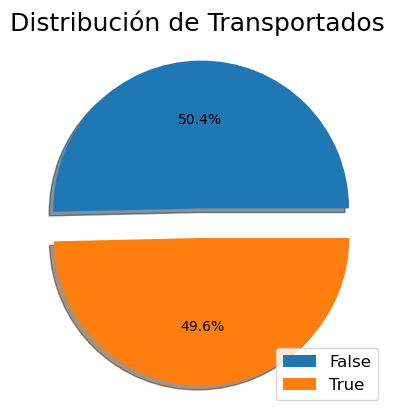

In [13]:
plt.pie(train_df['Transported'].value_counts(), shadow=True, explode=[.1,.1], autopct='%.1f%%')
plt.title('Distribución de Transportados ', size=18)
plt.legend(['False', 'True'], loc='best', fontsize=12)
plt.show()

###### 2- Grafico la variable "Age"

Edad media:  28.82793046746535
Edad mediana:  27.0


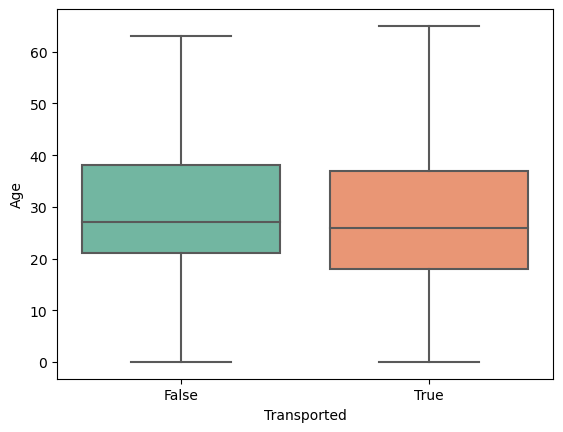

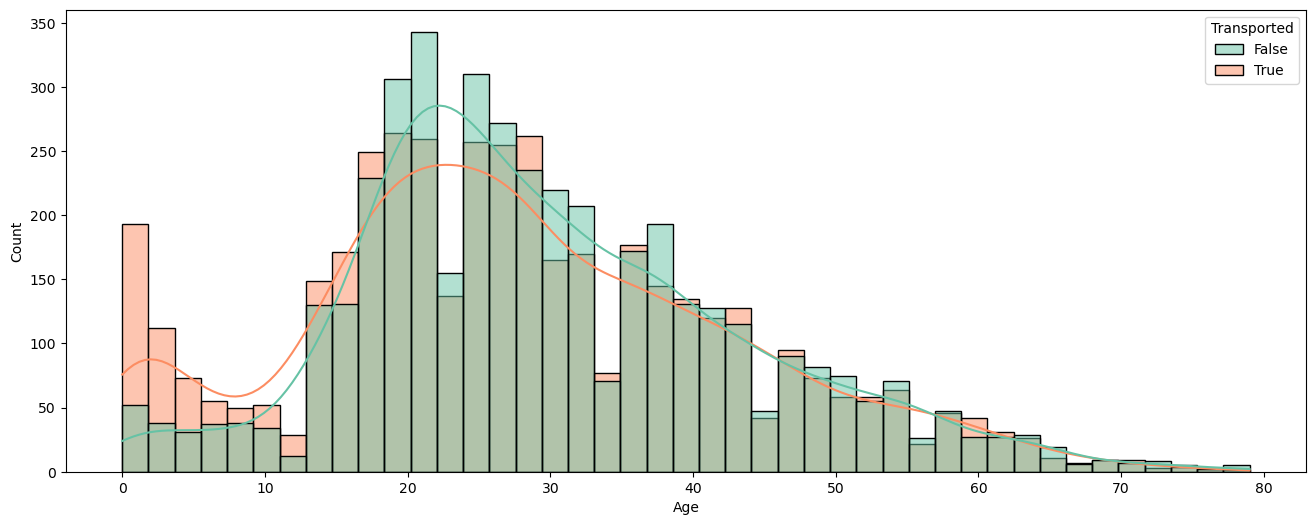

In [14]:
#Vizualización en forma de boxplot.
plt.figure()
sns.boxplot(data= train_df,
           x = 'Transported',
            y = 'Age',
            palette="Set2",
           showfliers = False)

#Visualización con histograma.
plt.figure(figsize=(16,6))
sns.histplot(data = train_df,
             hue = 'Transported',
             x = 'Age',
             palette="Set2",
            kde = True)

print("Edad media: ",train_df['Age'].mean())
print("Edad mediana: ",train_df['Age'].median())

>- La mayoría de los pasajeros tiene entra 18 y 33, siendo 27 la mediana y casi 29 la media.
>- Los menores de 18 son los mas transportados, sobre todo los de 0 años, o recien nacidos. 
>- De 18 a 33, parecen ser los menos trasportados, y los de mas 33 estan parejos.
>- En el proceso de feature engineering, se creará una variable que segmente por rango etareo.

###### 3- Visaualizaciones de las variables categóricas.

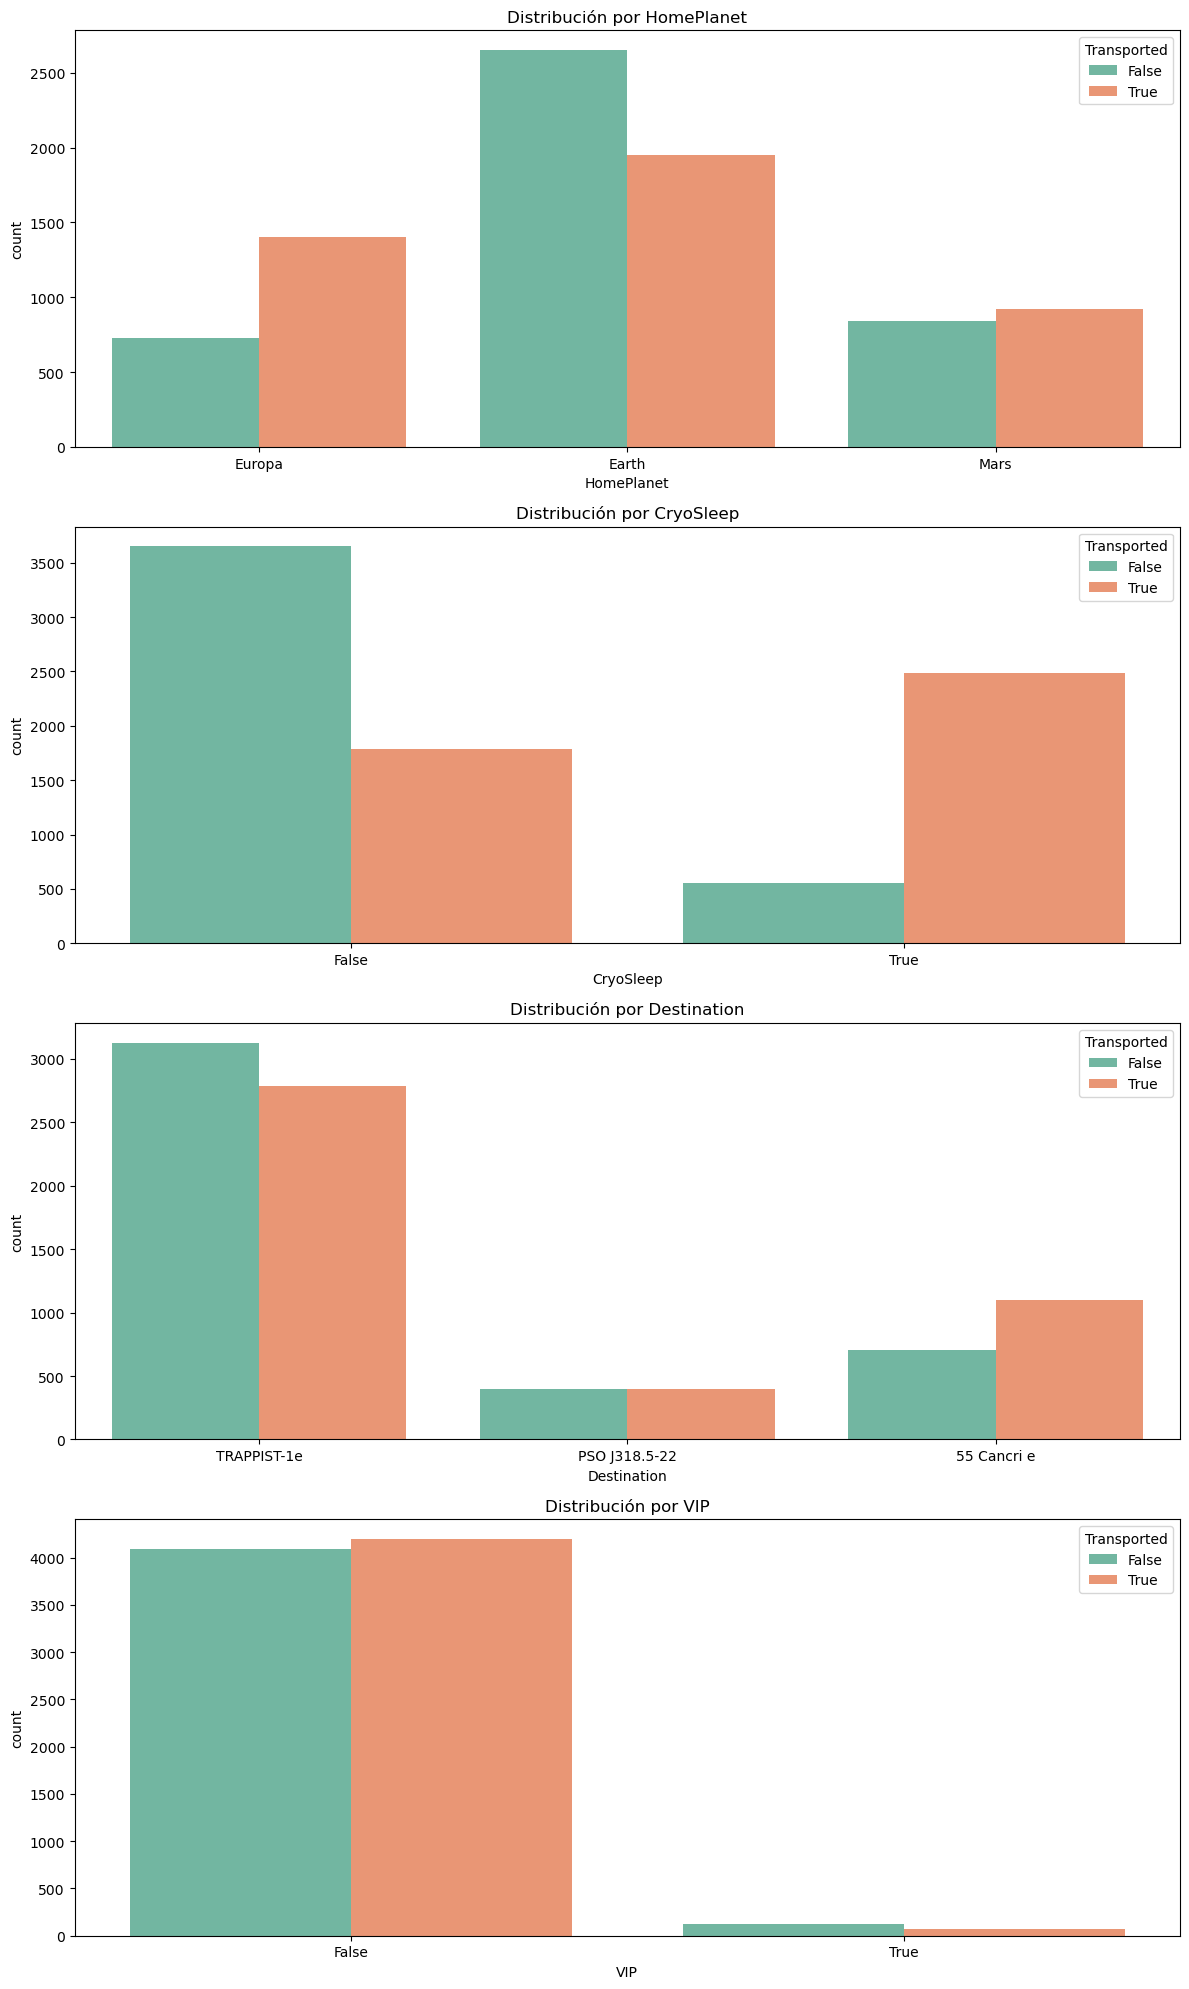

In [15]:
#Creo variable de tipo lista, que contenga las features categoricas del dataframre.
Categoricas = ["HomePlanet","CryoSleep","Destination","VIP"]

#Genero visualizaciones utilizando la list en un bucle "for".
plt.figure(figsize=(12,20))
for index,columna in enumerate(Categoricas):
    plt.subplot(4,1,index+1)
    sns.countplot(data = train_df,
                  x = columna,
                  palette= "Set2",
                  hue = "Transported")
    plt.title(f"Distribución por {columna}")
    plt.tight_layout()

- En la variable VIP, una categoría es muy dominante sobre la otra, por lo tanto a la hora de modelar, habrá que evaluar si conviene incluirla, ya que podría generar un sobre ajuste.  

- La mayoría de los pasajeros son de la Tierra, pero tiene una tasa menor de transportados a realidades alternas, comparandolos con Europa y Marte que tienen menos pasajeros, pero donde mas de la mitad no llegan a destino. 

- La mayoría de los pasajeros se dirigen hacia Trappist-1e

- La mayoría de los que viajan en modo "CryoSleep", fueron transportados a realidades alternas.

###### 4- Visaualizaciones de las variables numéricas.

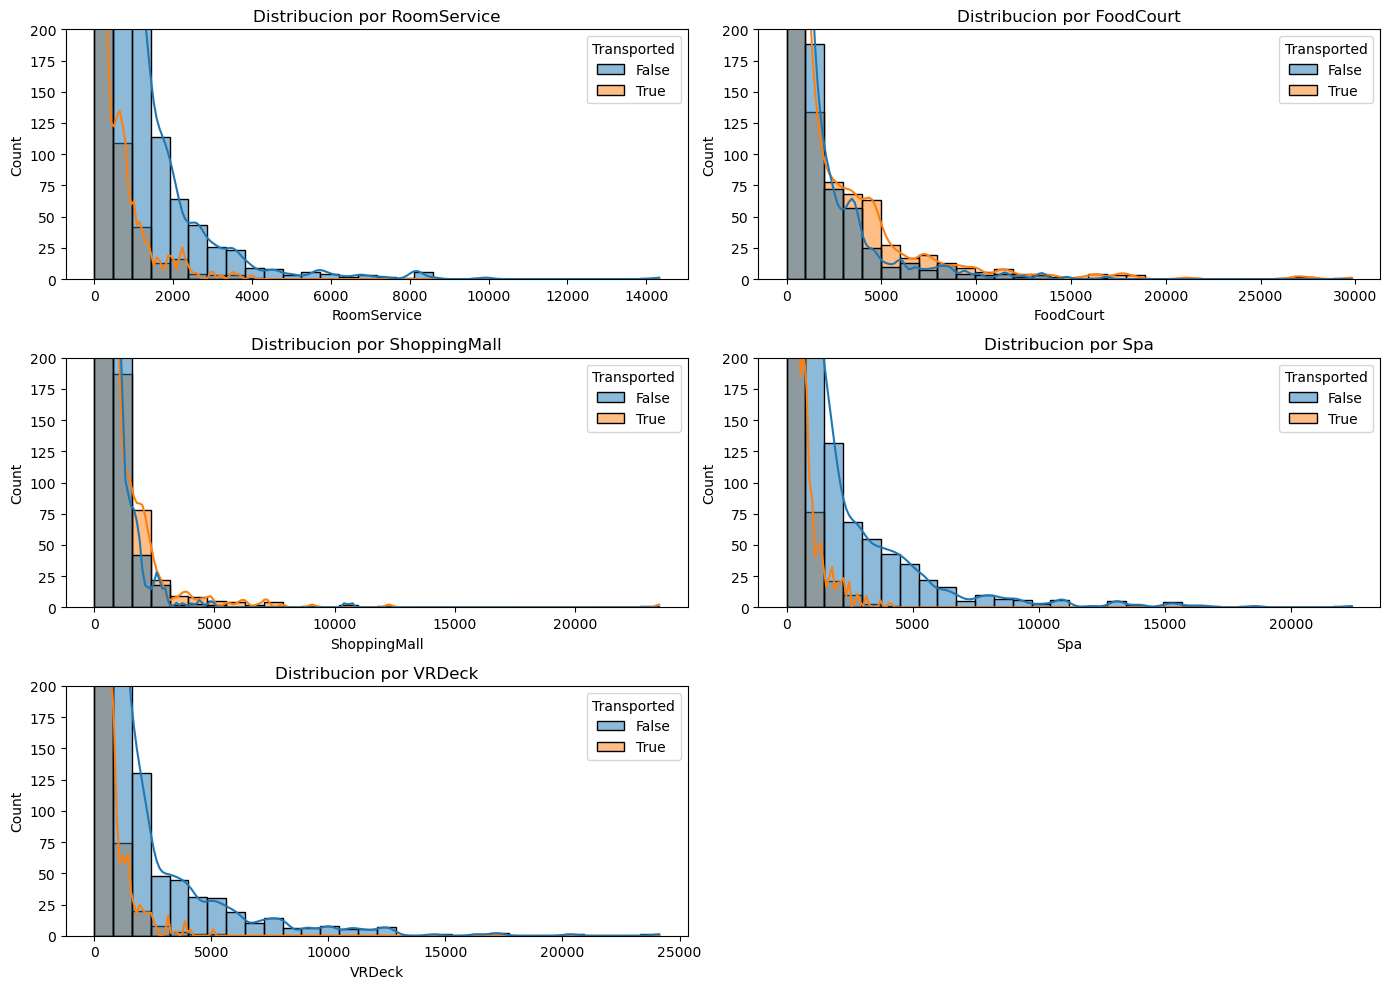

In [16]:
#Creo variable de tipo lista, que contenga las features numéricas. (gastos)
gastos = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

#Genero visualizaciones utilizando la list en un bucle "for".
plt.figure(figsize=(14,10))
for index,columna in enumerate(gastos):
    plt.subplot(3,2,index+1)
    sns.histplot(x=columna,
                 hue="Transported",
                 data=train_df,
                 bins=30,
                 kde=True,)
    plt.title(f"Distribucion por {columna}")
    plt.ylim(0,200)
    plt.tight_layout()

>- Distribución sesgada hacia la derecha de todas las variables, habrá que aplicar una transformación logaritmica para normalizar la curva, antes de hacerlo hay que hacer el tratamiento de los vacios que pueda llegar a haber en estas variables, para no generar el error del logaritmo de 0.
>- La mayoría de los pasajeros no gastaron.
>- Parece que los pasajeros que tienen menos gastos tienen más probabilidades de ser transportados que los pasajeros que tienen gastos altos.
>- Feature Engineering: Podemos crear una nueva variable que sea "Gasto total" que sea la suma de todos variables, y luego otra boleana "Sin gastos". Tambien podemos crear otra categorica, sobre el nivel de gastos: Bajo, medio, Alto.
>- Limité el eje Y en 200 porque si le saco el limite no se aprecia nada, ya que hay outliers:

# Feature Engineering
***


###### 1- Creo nueva variable "RangoEtario", para poder profundizar el análisis respecto a la edad

In [17]:
#Creo función, asi no repito el código para ambos DF's

def rango_etario(df): #Defino la función
    rango_etario  = [] #Variable lista, donde ira guardando cada itración  del bucle.
    for i in df["Age"]: #Bucle que recorre cada regsitro y completa la lista segun la condición.
        if i<=12:
            rango_etario.append("0-12")
        elif (i>12 and i<=18):
            rango_etario.append("13-18")
        elif (i>18 and i<=25):
            rango_etario.append("19-25")
        elif (i>25 and i<=32):
            rango_etario.append("26-32")
        elif (i>32 and i<=50):
            rango_etario.append("33-50")
        elif (i>50):
            rango_etario.append("50+")
        else:
            rango_etario.append(np.nan)
        
    df["RangoEtario"] = rango_etario #Se crea la variable con la data de la lista.
rango_etario(train_df)
rango_etario(test_df)

<Axes: xlabel='RangoEtario', ylabel='count'>

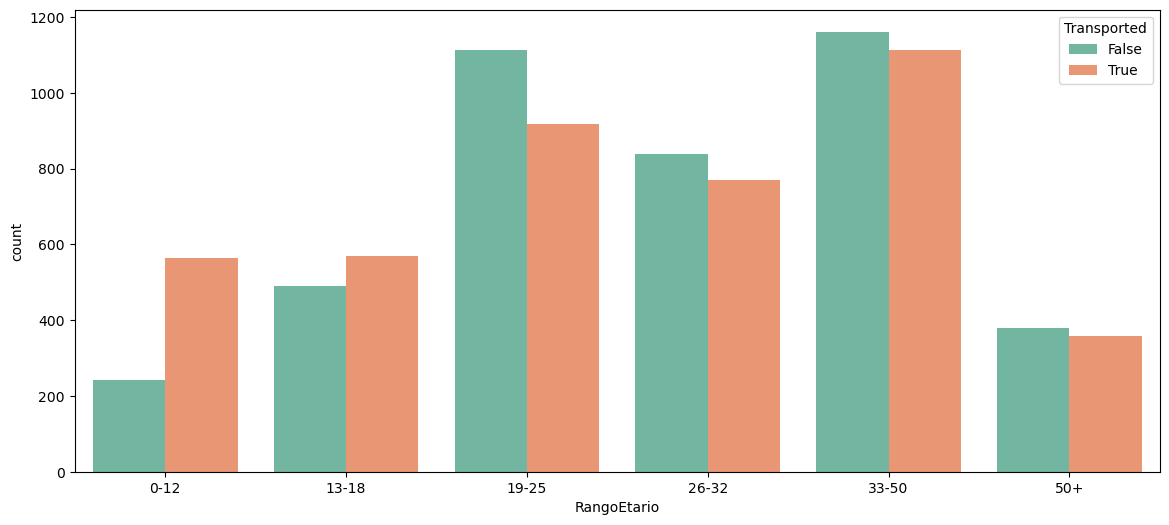

In [18]:
#Genero gráfico de la nueva variable. 
plt.figure(figsize = (14,6))
sns.countplot(data = train_df,
              x= "RangoEtario",
              hue="Transported",
              palette="Set2",
              order = sorted(train_df["RangoEtario"].value_counts().keys().tolist()))

>- Ahora podemos notar con mayor facilidad, la relevancia con el target.
>- Quienes tienen de 0 a 12 y de 13 a 18 años, son mas proclives a ser transportados.
>- 19-25, 26-32 y 33-50 son menos transportdoes.
>- Los mayores de 50 estan bastante parejos.

###### 2- Creo nueva variable "Gastos_totales" , "Sin_gastos" y "Categoria_gastos".

In [19]:
def nueva_gastos(df): #función para armar las nuevas features, si gastan o no gastan.
    df["Gastos_totales"] = df[gastos].sum(axis=1)
    df["Sin_gastos"] = (df["Gastos_totales"]==0) 
    
nueva_gastos(train_df)
nueva_gastos(test_df)

In [20]:
train_df.head() #chequeo resultado.

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,RangoEtario,Gastos_totales,Sin_gastos
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,33-50,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,19-25,736.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,50+,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,33-50,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,13-18,1091.0,False


In [21]:
'''Tomando como referencia los quartiles y la mediana, contruiré nueva variable categorica de
gastos, que los segmente por nivel de gasto.'''

train_df['Gastos_totales'].describe()

count     8693.000000
mean      1440.866329
std       2803.045694
min          0.000000
25%          0.000000
50%        716.000000
75%       1441.000000
max      35987.000000
Name: Gastos_totales, dtype: float64

In [22]:
'''Al igual que con la edad, armo función con bucle "for", en este caso completa la lista
con el nivel de gasto segun la condición establecida, para luego agregar los datos a la nueva
variable del dataframe'''

def categoria_gastos(df):
    categoria_gastos = []
    
    for i in df["Gastos_totales"]:
        if i==0:
            categoria_gastos.append("Sin gastos")
        elif (i>0 and i<=716):
            categoria_gastos.append("Gasto bajo")
        elif (i>716 and i<=1441):
            categoria_gastos.append("Gasto medio")
        elif (i>1441):
            categoria_gastos.append("Gasto alto")
    
    df["Categoria_gastos"] = categoria_gastos
    
categoria_gastos(train_df)
categoria_gastos(test_df)

In [23]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,RangoEtario,Gastos_totales,Sin_gastos,Categoria_gastos
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,33-50,0.0,True,Sin gastos
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,19-25,736.0,False,Gasto medio
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,50+,10383.0,False,Gasto alto
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,33-50,5176.0,False,Gasto alto
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,13-18,1091.0,False,Gasto medio


Text(0.5, 1.0, 'Distribución total de gastos')

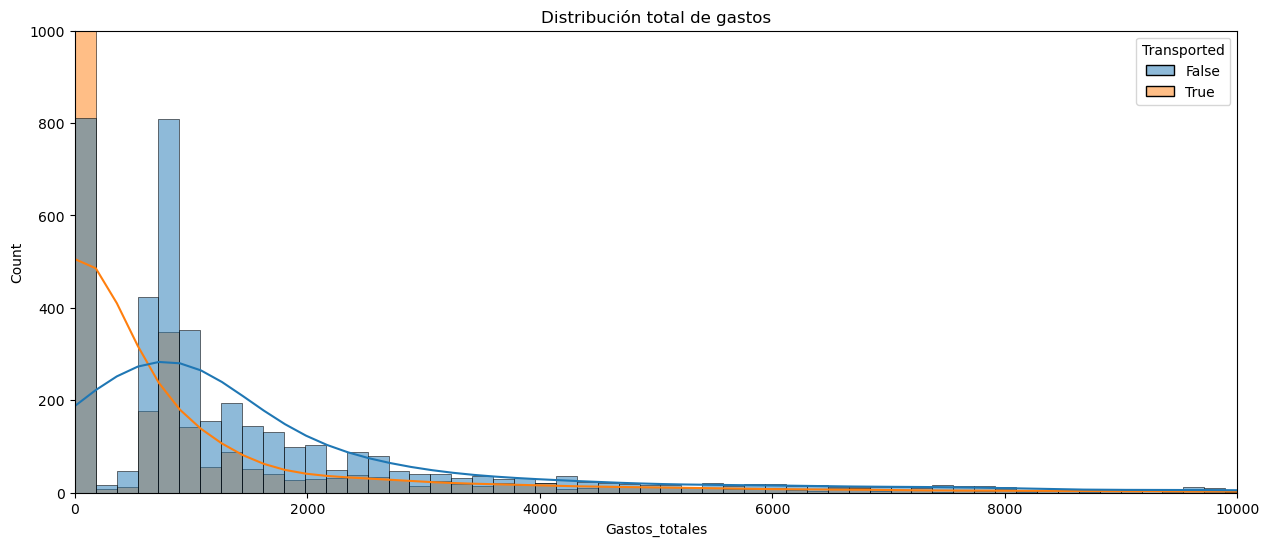

In [24]:
#Visualizo nueva variable de total de gastos
plt.figure(figsize=(15,6))
sns.histplot(x="Gastos_totales",
             hue="Transported",
             data = train_df,
             kde=True,
             bins=200);
plt.ylim(0,1000)
plt.xlim(0,10000)
plt.title("Distribución total de gastos")

>- Al igual que con las gastos individuales, deberiamos aplicarle el logaritmo.

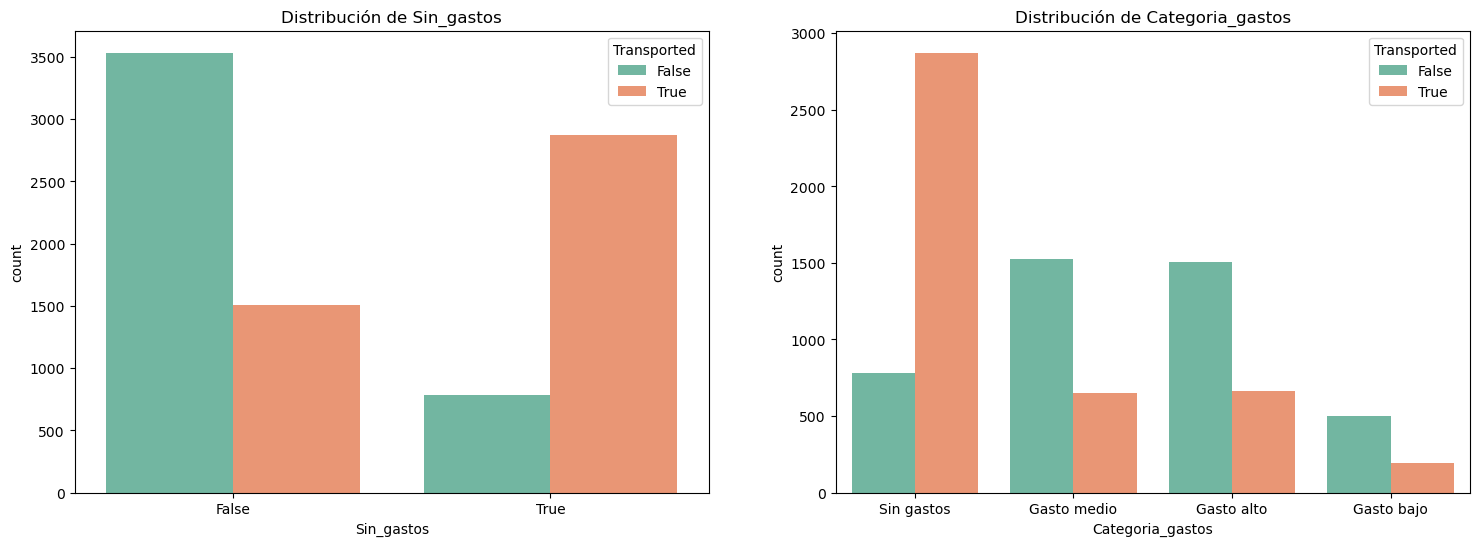

In [25]:
gastos2 = ["Sin_gastos", "Categoria_gastos"]

plt.figure(figsize=(18,6))
for idx,columna in enumerate(gastos2):
    plt.subplot(1,2,idx+1)
    sns.countplot(x = columna,
                  hue = "Transported",
                  data = train_df,
                 palette = "Set2")
    plt.title(f"Distribución de {columna}")

>- Con estas nuevas features, podemos ver claramente como los pasajeros sin gastos, 
son altamente transportados a realidades alternas.
>- La asociación que podemos hacer es que los que no tienen gastados, deben ser tambien, los que estan en CryoSleep, se me ocurre que al completar vacios, en las variables de gastos, debería poner 0 a todos los pasajeros que viajan en esta condición.
>- Aunque también podría completar todos los vacios de gastos por 0.

In [26]:
#Compruebo que queines estan en cryo, no gastan.
#Use el dato o no, ayuda para ratificar que la data es confiable.
CryoTrue = train_df['CryoSleep'] == True
train_df[CryoTrue].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Gastos_totales
count,2955.000000,2969.0,2967.0,2941.0,2972.0,2975.0,3037.0
mean,27.405415,0.0,0.0,0.0,0.0,0.0,0.0
std,15.080469,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,26.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,37.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,78.000000,0.0,0.0,0.0,0.0,0.0,0.0


###### 3- Creo nueva features  "Deck" , "Num" y "Side", a partir de la variable "Cabin".
- Como tine una alta cardinalidad, podemos armar 3 nuevas variables, para extraer sobre todo
Deck y Side, que son categoricas. 
- "Num", es el numero de habitación y segirá teniendo alta cardinalidad.

In [27]:
#Armo las 3 nuevas variables, haceindo split en "/".

train_df[['Deck','Num','Side']] = train_df.Cabin.str.split('/',expand=True)
test_df[['Deck','Num','Side']] = test_df.Cabin.str.split('/',expand=True)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,RangoEtario,Gastos_totales,Sin_gastos,Categoria_gastos,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,33-50,0.0,True,Sin gastos,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,19-25,736.0,False,Gasto medio,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,50+,10383.0,False,Gasto alto,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,33-50,5176.0,False,Gasto alto,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,13-18,1091.0,False,Gasto medio,F,1,S


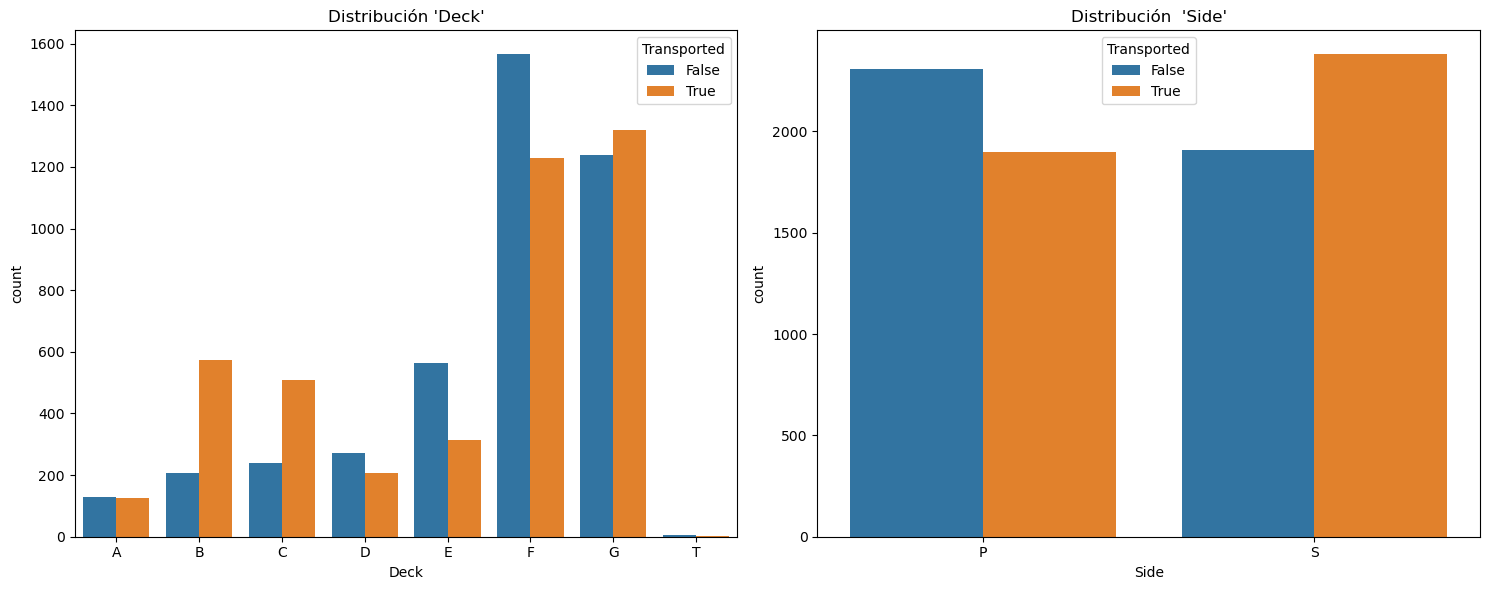

In [28]:

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data = train_df,
              x = "Deck",
              hue = "Transported",
              order=["A","B","C","D","E","F","G","T"])
plt.title("Distribución 'Deck'")

plt.subplot(1,2,2)
sns.countplot(data = train_df,
              x ="Side",
              hue = "Transported")
plt.title("Distribución  'Side'")
plt.tight_layout()
plt.show()

- La mayória de los pasajeros son del Deck F y G.
- En Deck T hay muy pocos pasajeros.
- Pasajeros de cabinas del deck B y C, son altamente transportados.
- Respecto al Side, vemos que los pasajeros estan repartidos en mitades, pero que los del lado "S", son mas transportados que los del P.

<Axes: xlabel='Num', ylabel='Count'>

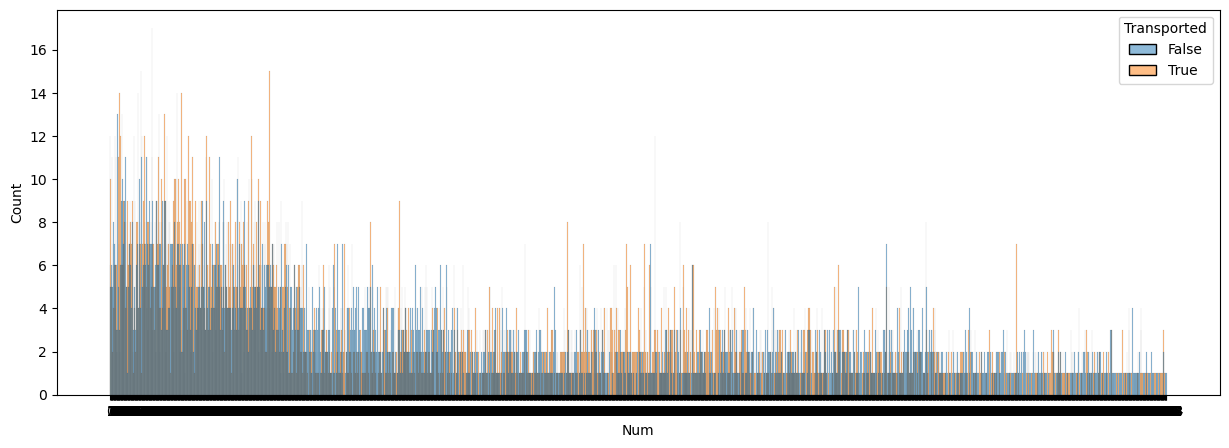

In [29]:
#Grafico "NUM", para demostrar que el dato, al menos así, no sirve para nada.
plt.figure(figsize=(15,5))
sns.histplot(data = train_df,
             hue = 'Transported',
             x = 'Num')

###### 4- Creo nuevas features  "CantidadGrupo" y "ViajaSolo", a partir de la variable "PassengerId:".

- Según descripción de la variable, "gggg" indica el grupo y "pp" la cantidad de pasajeros en el grupo.
- Lo que haré es separar esa información para armar dos variables, una numerica que indique el tamaño del grupo y otra categorica que indique si viaja solo o no.


In [30]:
def passengerid_nueva(df):
    #Separo PassengerId em dos nuevas variables. (luego las descartaré)
    df["Grupo"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Miembros"] = df["PassengerId"].apply(lambda x: x.split("_")[1])
    
    #Agrupa por grupo y cuenta cantidad de miembros para cada grupo.
    x = df.groupby("Grupo")["Miembros"].count().sort_values()
    
    #Crea un set de datos que contiene todos los grupos con mas de 1 miembro
    y = set(x[x>1].index)
    
    '''Creo la nueva variable ViajaSolo, selecciono los grupos que no integran la variable "y",
    es decir, que no contienen mas de un miembro'''
    
    df["ViajaSolo"] = df["Grupo"].apply(lambda x: x not in y)
    
    '''Creo la variable "CantidadGrupo", el bucle "for" ira completando el dato tomandolo de la 
    variable "x" definida en esta función'''
    
    df["CantidadGrupo"]=0
    for i in x.items():
        df.loc[df["Grupo"]==i[0],"CantidadGrupo"]=i[1]

In [31]:
passengerid_nueva(train_df)
passengerid_nueva(test_df)

In [32]:
train_df  #Chequeo las nuevas variable. Esta OK.

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Gastos_totales,Sin_gastos,Categoria_gastos,Deck,Num,Side,Grupo,Miembros,ViajaSolo,CantidadGrupo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,True,Sin gastos,B,0,P,0001,01,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,736.0,False,Gasto medio,F,0,S,0002,01,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,10383.0,False,Gasto alto,A,0,S,0003,01,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,5176.0,False,Gasto alto,A,0,S,0003,02,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1091.0,False,Gasto medio,F,1,S,0004,01,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,8536.0,False,Gasto alto,A,98,P,9276,01,True,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,True,Sin gastos,G,1499,S,9278,01,True,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,1873.0,False,Gasto alto,G,1500,S,9279,01,True,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,4637.0,False,Gasto alto,E,608,S,9280,01,False,2


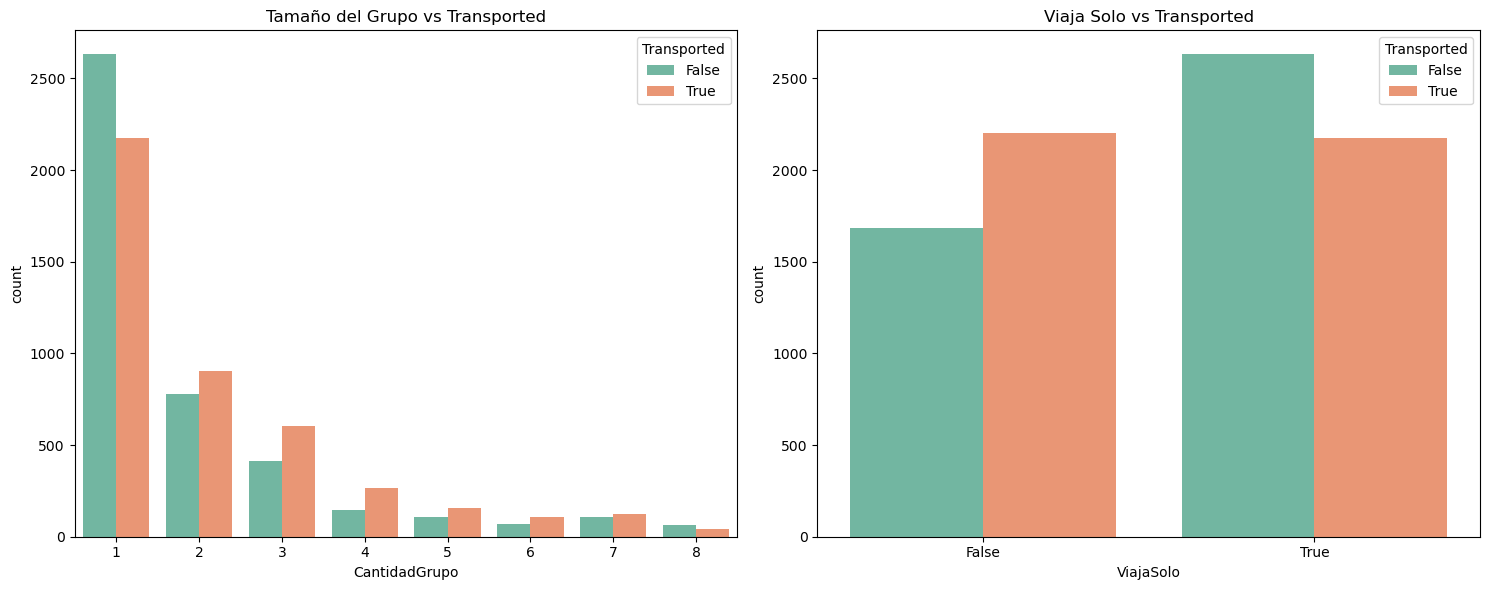

In [33]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x = "CantidadGrupo",
              hue = "Transported",
              data = train_df,
              palette = "Set2")
plt.title("Tamaño del Grupo vs Transported")

plt.subplot(1,2,2)
sns.countplot(x = "ViajaSolo",
              hue = "Transported",
              data = train_df,
              palette = "Set2")
plt.title("Viaja Solo vs Transported")
plt.tight_layout()
plt.show()

>- La mayoría de los pasajeros viajan solos
>- Queines viajan solos son menos transportados a relidades alternas, que quienes viajan en grupo.

# Data wrangling
*********

###### 1- Elimino variables con cardinalidad alta, no sirven para entregar a los modelos.  Podria optar por dejarlas y simplemente no elegirlas como variables predictoras, pero decidí eliminarlas.

In [34]:
print(train_df.select_dtypes(include="object").nunique())
print("\n","-"*70)
print(test_df.select_dtypes(include="object").nunique())

PassengerId         8693
HomePlanet             3
CryoSleep              2
Cabin               6560
Destination            3
VIP                    2
Name                8473
RangoEtario            6
Categoria_gastos       4
Deck                   8
Num                 1817
Side                   2
Grupo               6217
Miembros               8
dtype: int64

 ----------------------------------------------------------------------
PassengerId         4277
HomePlanet             3
CryoSleep              2
Cabin               3265
Destination            3
VIP                    2
Name                4176
RangoEtario            6
Categoria_gastos       4
Deck                   8
Num                 1505
Side                   2
Grupo               3063
Miembros               8
dtype: int64


In [35]:
#Elimino variables de alta cardnialidad y las que se usuaron para crear nuevas.
train_df= train_df.drop(['Name','Cabin','Num','Grupo','Miembros'],axis=1)
test_df= test_df.drop(['Name','Cabin','Num','Grupo','Miembros'],axis=1)

In [36]:
#Como tampoco necesito PassangerId, pero no quiero perderlo, lo convierto en idice.
train_df.set_index('PassengerId',inplace=True)
test_df.set_index('PassengerId',inplace=True)

In [37]:
train_df.head(3) #Tiro el head para ver que la  estructura del df sea correcta.

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,RangoEtario,Gastos_totales,Sin_gastos,Categoria_gastos,Deck,Side,ViajaSolo,CantidadGrupo
PassengerId,,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,33-50,0.0,True,Sin gastos,B,P,True,1
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,19-25,736.0,False,Gasto medio,F,S,True,1
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,50+,10383.0,False,Gasto alto,A,S,False,2


###### 2- Completo registros vacios, lo haré mediante "Simpleimputer" de Sklearn.
>Como son pocos casos, opto por no eliminar los vacios, completarlos con la mediana, para las variables numericas, y con la el valor mas frecuente para las categoricas.

In [38]:
vacio_test = (test_df.isnull().sum()[test_df.isnull().sum()>0]).to_frame().rename(columns={0:"Cantidad de vacios"})
vacio_test["% de Vacios"] = round((100*test_df.isnull().sum()[test_df.isnull().sum()>0]/len(test_df)),2).values
vacio_test

,Cantidad de vacios,% de Vacios
HomePlanet,87,2.03
CryoSleep,93,2.17
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36
VRDeck,80,1.87


In [39]:
#defino dos listas con las variables categoricas y nuericas
cat_cols = train_df.select_dtypes(include=["object","bool"]).columns.tolist()
cat_cols.remove("Transported")
num_cols = train_df.select_dtypes(include=["int","float"]).columns.tolist()

In [40]:
print("* Categoricas:",cat_cols)
print("\n")
print("* Numericas:",num_cols)

* Categoricas: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RangoEtario', 'Sin_gastos', 'Categoria_gastos', 'Deck', 'Side', 'ViajaSolo']


* Numericas: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Gastos_totales', 'CantidadGrupo']


In [41]:
#Defino las estrategias para cada caso.
imputer1 = SimpleImputer(strategy="most_frequent")     #Para completras las variables categoricas.
imputer2 = SimpleImputer(strategy="median")            #Para completras las variables numericas.

In [42]:
#Creo función para hacer la transformación en ambos datasets.
def vacios(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [43]:
vacios(train_df)
vacios(test_df)

In [44]:
#Corroboro que la función se haya comportado acorde a lo esperado.
print("vacios train: ",train_df.isnull().sum().sum())
print("vacios test: ",test_df.isnull().sum().sum())

vacios train:  0
vacios test:  0


###### 3- Transformación logarítmica.
>Como las features relacionada a los gastos, mostraban graficos segados hacia la derecha, le aplicaré esta transformación, la cual permite normalizar la curva, y proveerle al modelo información que permita un mejor resultado.

In [45]:
#Creo la nueas variables gastos con la modificación logaritmica:

train_df['RoomServiceLog'] = np.log(1+train_df['RoomService'])
train_df['FoodCourtLog'] = np.log(1+train_df['FoodCourt'])
train_df['ShoppingMallLog'] = np.log(1+train_df['ShoppingMall'])
train_df['SpaLog'] = np.log(1+train_df['Spa'])
train_df['VRDeckLog'] = np.log(1+train_df['VRDeck'])
train_df['Gastos_totalesLog'] = np.log(1+train_df['Gastos_totales'])

In [46]:
test_df['RoomServiceLog'] = np.log(1+test_df['RoomService'])
test_df['FoodCourtLog'] = np.log(1+test_df['FoodCourt'])
test_df['ShoppingMallLog'] = np.log(1+test_df['ShoppingMall'])
test_df['SpaLog'] = np.log(1+test_df['Spa'])
test_df['VRDeckLog'] = np.log(1+test_df['VRDeck'])
test_df['Gastos_totalesLog'] = np.log(1+test_df['Gastos_totales'])

In [47]:
train_df.head(3) #Chequeo resultado sobre train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Deck,Side,ViajaSolo,CantidadGrupo,RoomServiceLog,FoodCourtLog,ShoppingMallLog,SpaLog,VRDeckLog,Gastos_totalesLog
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,B,P,True,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,F,S,True,1.0,4.70048,2.302585,3.258097,6.309918,3.806662,6.602588
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,A,S,False,2.0,3.78419,8.182280,0.000000,8.812248,3.912023,9.248021


In [48]:
test_df.head(3) #Chequeo resultado sobre test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Deck,Side,ViajaSolo,CantidadGrupo,RoomServiceLog,FoodCourtLog,ShoppingMallLog,SpaLog,VRDeckLog,Gastos_totalesLog
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,...,G,S,True,1.0,0.0,0.000000,0.0,0.00000,0.0,0.000000
0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,...,F,S,True,1.0,0.0,2.302585,0.0,7.94591,0.0,7.949091
0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,...,C,S,True,1.0,0.0,0.000000,0.0,0.00000,0.0,0.000000


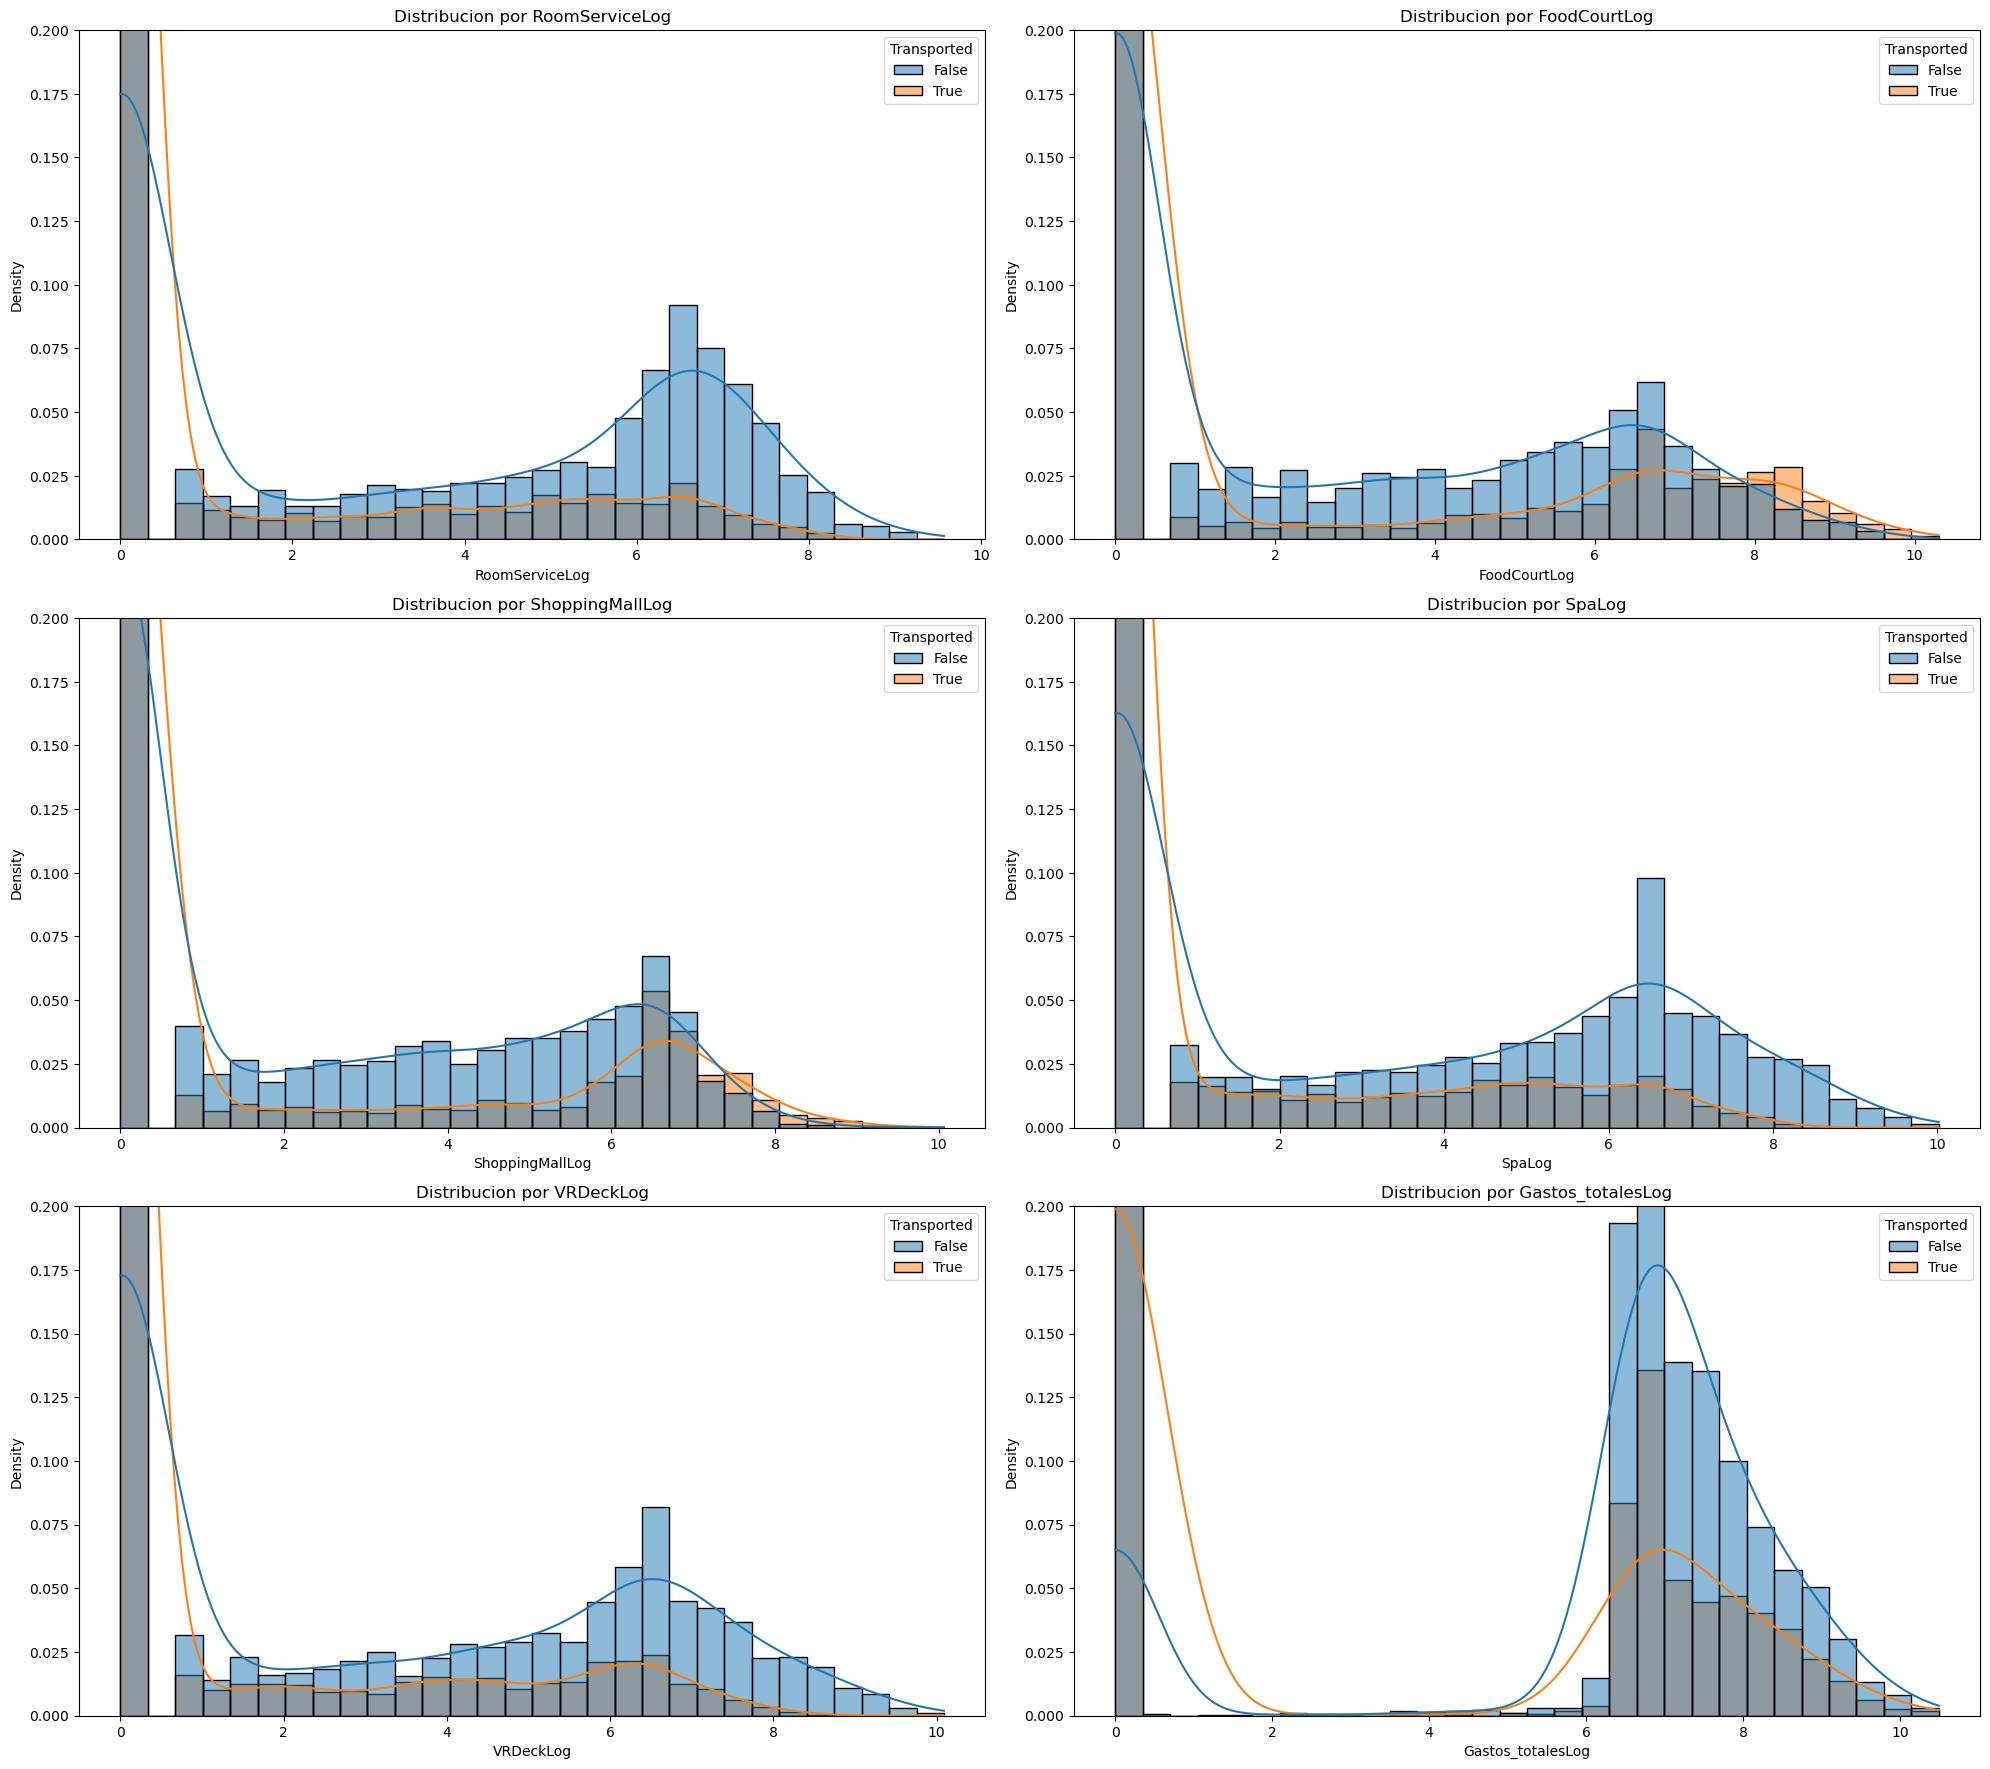

In [49]:
#Visualizo las como quedaron los graficos con el Log aplicado:
gastosLog = ["RoomServiceLog","FoodCourtLog","ShoppingMallLog","SpaLog","VRDeckLog","Gastos_totalesLog"]

plt.figure(figsize=(20,35))
for idx,columna in enumerate(gastosLog):
    plt.subplot(6,2,idx+1)
    sns.histplot(x=columna,
                 hue="Transported",
                 data=train_df,
                 bins=30,
                 kde=True,
                 stat = "density" ,)
    plt.title(f"Distribucion por {columna}")
    plt.tight_layout()
    plt.ylim(0,0.2)

###### 4- Tipo de variables.
> Como se pudo ver en el EDA, había variables booleanas con tipo "Object", por eso debemos convertiras a "bool". A las existentes, debo sumarle las nuevas features, "Sin_gastos" y "ViajaSolo"

In [50]:
#Transformo variables que deben ser booleanas:
Vbool = ["CryoSleep","VIP","Sin_gastos","ViajaSolo"]
train_df[Vbool] = train_df[Vbool].astype(bool)
test_df[Vbool] = test_df[Vbool].astype(bool)

In [51]:
train_df.dtypes

HomePlanet            object
CryoSleep               bool
Destination           object
Age                  float64
VIP                     bool
RoomService          float64
FoodCourt            float64
ShoppingMall         float64
Spa                  float64
VRDeck               float64
Transported             bool
RangoEtario           object
Gastos_totales       float64
Sin_gastos              bool
Categoria_gastos      object
Deck                  object
Side                  object
ViajaSolo               bool
CantidadGrupo        float64
RoomServiceLog       float64
FoodCourtLog         float64
ShoppingMallLog      float64
SpaLog               float64
VRDeckLog            float64
Gastos_totalesLog    float64
dtype: object

In [52]:
test_df.dtypes

HomePlanet            object
CryoSleep               bool
Destination           object
Age                  float64
VIP                     bool
RoomService          float64
FoodCourt            float64
ShoppingMall         float64
Spa                  float64
VRDeck               float64
RangoEtario           object
Gastos_totales       float64
Sin_gastos              bool
Categoria_gastos      object
Deck                  object
Side                  object
ViajaSolo               bool
CantidadGrupo        float64
RoomServiceLog       float64
FoodCourtLog         float64
ShoppingMallLog      float64
SpaLog               float64
VRDeckLog            float64
Gastos_totalesLog    float64
dtype: object

 ###### 5- Feature Encoding
 
>- Las variables categoricas nominales, es decir que no se pueden ordenar, les haré "One Hot Encoder" ya que dentro tienen pocas categorias, de este modo generaremos nuevas varaibles para cada una de ellas.
 
 >- Las variables caegoricas ordinales, es decir las que se pueden ordenar, le asignaremos un numero usando el metodo "Label Encoder"
 
 >- Tambien, reemplazaré la variable target, acutalmente como true/false, por 1 y 0, asi lo requieren los algortimos de modelaje.


In [53]:
nominal = ["HomePlanet","Destination"]
ordinal = ["CryoSleep","VIP","Deck","Side","RangoEtario","Sin_gastos",
                    "Categoria_gastos","ViajaSolo"]

In [54]:
# One Hot Encoder:

train_df = pd.get_dummies(train_df, columns = nominal)
test_df = pd.get_dummies(test_df, columns = nominal)

In [55]:
#Label Encoder:

train_df[ordinal] = train_df[ordinal].apply(LabelEncoder().fit_transform)
test_df[ordinal] = test_df[ordinal].apply(LabelEncoder().fit_transform)

In [56]:
#Remplazo False/True por 0/1, para convertir la varialbe a numerica:

train_df["Transported"].replace({False:0,True:1},inplace=True)

###### 6- Elimino las columnas de los gastos, ya que para el modelo utilizaré las normalizadas por logaritmo.


In [57]:
eliminar = ["RoomService","FoodCourt","Spa","ShoppingMall","VRDeck","Gastos_totales"]
train_df.drop(columns = eliminar, inplace=True)
test_df.drop(columns= eliminar, inplace=True)

"""No sé técnicamente, si conviene hacer esto, o si sería mejor conservar ambos, en el DF original
 y luego hacer un nuevo DF con la selección de features para el modelo"""

'No sé técnicamente, si conviene hacer esto, o si sería mejor conservar ambos, en el DF original\n y luego hacer un nuevo DF con la selección de features para el modelo'

###### 7- Modifico el nombre de las variables de destino, ya que creo que me fallaba el modelaje por los numeros, espacios o carecteres especiales como el punto.

In [58]:
train_df.rename(columns = {'Destination_55 Cancri e' : 'Destination_Cancri', 'Destination_PSO J318.5-22': 'Destination_PSO','Destination_TRAPPIST-1e':'Destination_TRAPPIST'}, inplace = True)
test_df.rename(columns = {'Destination_55 Cancri e' : 'Destination_Cancri', 'Destination_PSO J318.5-22': 'Destination_PSO','Destination_TRAPPIST-1e':'Destination_TRAPPIST'}, inplace = True)

In [59]:
train_df.head()

,CryoSleep,Age,VIP,Transported,RangoEtario,Sin_gastos,Categoria_gastos,Deck,Side,ViajaSolo,...,ShoppingMallLog,SpaLog,VRDeckLog,Gastos_totalesLog,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Cancri,Destination_PSO,Destination_TRAPPIST
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,39.0,0,0,4,1,3,1,0,1,...,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,1
0002_01,0,24.0,0,1,2,0,2,5,1,1,...,3.258097,6.309918,3.806662,6.602588,1,0,0,0,0,1
0003_01,0,58.0,1,0,5,0,0,0,1,0,...,0.000000,8.812248,3.912023,9.248021,0,1,0,0,0,1
0003_02,0,33.0,0,0,4,0,0,0,1,0,...,5.918894,8.110728,5.267858,8.551981,0,1,0,0,0,1
0004_01,0,16.0,0,1,1,0,2,5,1,1,...,5.023881,6.338594,1.098612,6.995766,1,0,0,0,0,1


In [60]:
train_df.dtypes

CryoSleep                 int64
Age                     float64
VIP                       int64
Transported               int64
RangoEtario               int32
Sin_gastos                int64
Categoria_gastos          int32
Deck                      int32
Side                      int32
ViajaSolo                 int64
CantidadGrupo           float64
RoomServiceLog          float64
FoodCourtLog            float64
ShoppingMallLog         float64
SpaLog                  float64
VRDeckLog               float64
Gastos_totalesLog       float64
HomePlanet_Earth          uint8
HomePlanet_Europa         uint8
HomePlanet_Mars           uint8
Destination_Cancri        uint8
Destination_PSO           uint8
Destination_TRAPPIST      uint8
dtype: object

>Dejando todas las variables de tipos numericas, sin vacios, ni duplicados, habiendo corregido nombre de variables, y haber eliminado variables de alta cardnialidad, podríamos decir que ya estamos en condiciones de entregarle data digerible para los modelos.

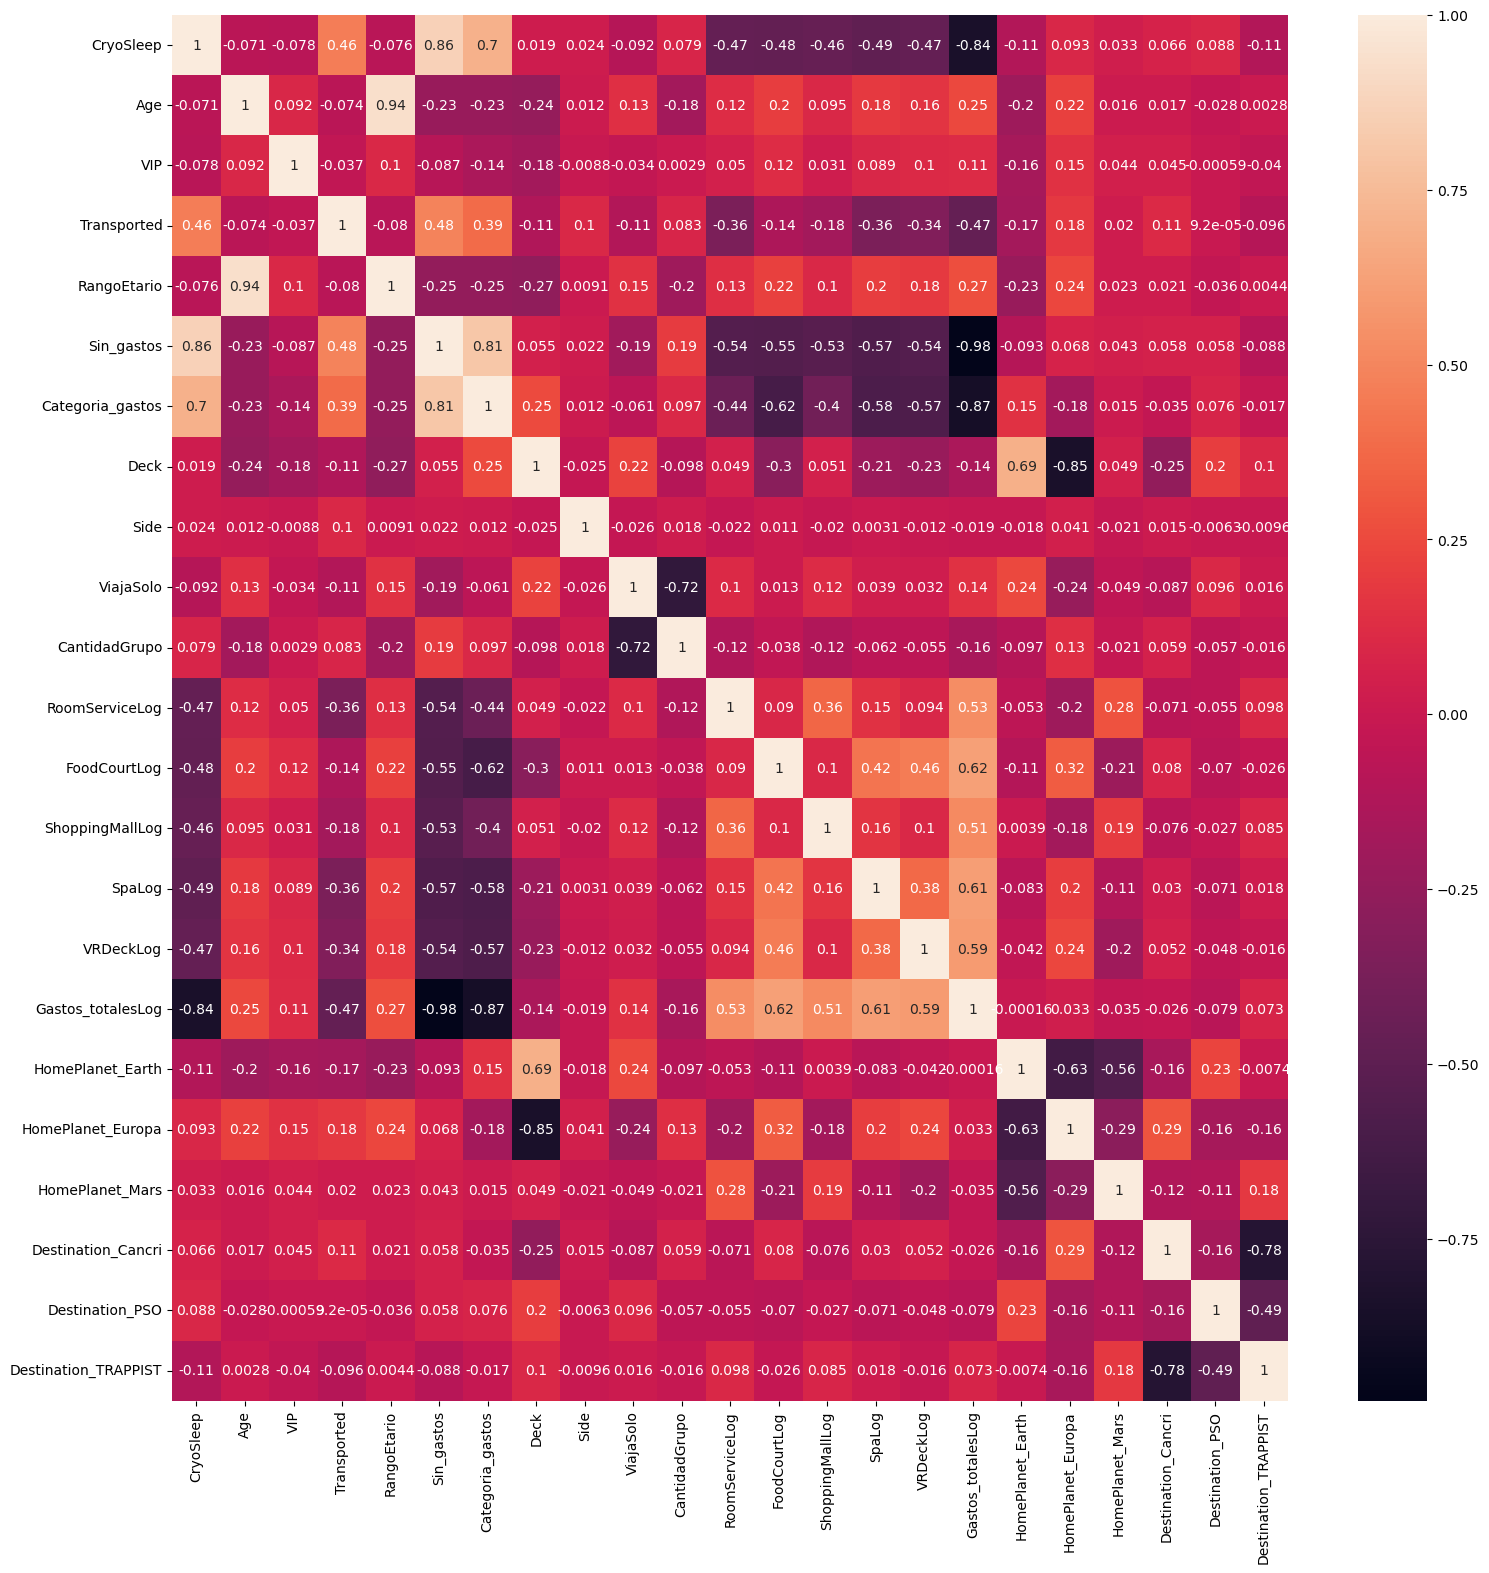

In [61]:
#Hago gráfico de correlación entre variables
plt.figure(figsize=(18,18))
sns.heatmap(train_df.corr(), annot=True);

>"Gastos totales" / "Sin_gastos" se muestra como la variable mas importe o de mayor relevancia respecto al taraget, le sigue CryoSleep, que a su vez mantiene una alta correlación con la primera, tal como vismo en el EDA, los que viajan en cryo, no gastan.
>VIP, támbien como se observo en el análisis exploratorio,  parece ser le de menor peso.

# Modelos y algoritmos de Machine Learning
***

#### Modelo 1 - Regresión Logistica con todas las variables.
>- Este primer modelo, lo dejo en el notebook con la intención de mostrar parte de mi aprendizaje. Lo desarrollé para una de las primeras preentregas, utilizando las herramientas obtenidas hasta entonces.
>- Me parece interesante dejarlo, porque se puede ver aplicada la teoría aprendida, comprender los coeficientes y p-values, como se construyen las métricas, armar la matriz de confusión, etc.
>- Para este modelo utilicé la librería "statsmodels", para los sigueintes Sklearn, por lo que lo inciado aquí termina abandonado, es por eso que aclaro que aun así, decido dejarlo como parte del proceso de aprender, investigar y desarrollar.

Como voy a utilziar todas las variables, elimino solo el terget de la selección de predictores.


In [62]:
features_selection = train_df.drop(columns=["Transported"]).columns
features_selection

Index(['CryoSleep', 'Age', 'VIP', 'RangoEtario', 'Sin_gastos',
       'Categoria_gastos', 'Deck', 'Side', 'ViajaSolo', 'CantidadGrupo',
       'RoomServiceLog', 'FoodCourtLog', 'ShoppingMallLog', 'SpaLog',
       'VRDeckLog', 'Gastos_totalesLog', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_Cancri',
       'Destination_PSO', 'Destination_TRAPPIST'],
      dtype='object')

In [63]:
#Spliteo el DF.
train,test = train_test_split(train_df,
                                    test_size = 0.2, #Porcentaje de muestra test 
                                    random_state = 0) #Semilla

In [64]:
#Corroboro que el train y test haya sido spliteado correctamente.
print('Transported Promedio en Train')
print(train['Transported'].mean())
print('Transported Promedio en Test')
print(test['Transported'].mean())
print(train.shape, test.shape)

Transported Promedio en Train
0.5035950532067874
Transported Promedio en Test
0.503737780333525
(6954, 23) (1739, 23)


Ajusto el modelo con las variables seleccionadas:

In [65]:
formula_modelo1 = 'Transported ~ ' + ' + '.join(train[features_selection].columns)
reg_log = smf.logit(formula_modelo1, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.480698
         Iterations 9


In [66]:
# Ver coeficientes y p valores
coeficientes = reg_log.params
pvalores = reg_log.pvalues
print("")
print("Coeficientes:")
print(coeficientes.round(4))
print("")
print("P-Values:")
print(pvalores.round(6))


Coeficientes:
Intercept               0.4546
CryoSleep               0.9072
Age                     0.0000
VIP                    -0.4778
RangoEtario            -0.0646
Sin_gastos             -0.1263
Categoria_gastos        0.2424
Deck                   -0.0597
Side                    0.5006
ViajaSolo              -0.1428
CantidadGrupo          -0.0596
RoomServiceLog         -0.1992
FoodCourtLog            0.1519
ShoppingMallLog         0.1167
SpaLog                 -0.2346
VRDeckLog              -0.2223
Gastos_totalesLog      -0.0239
HomePlanet_Earth       -0.5462
HomePlanet_Europa       0.9917
HomePlanet_Mars         0.0091
Destination_Cancri      0.4016
Destination_PSO         0.0741
Destination_TRAPPIST   -0.0211
dtype: float64

P-Values:
Intercept                    NaN
CryoSleep               0.000000
Age                     0.993777
VIP                     0.023426
RangoEtario             0.295105
Sin_gastos              0.768895
Categoria_gastos        0.000026
Deck           

In [67]:
#Otro resumen del modelo aplicado.
Resumen = reg_log.summary()
print(Resumen)

                           Logit Regression Results                           
Dep. Variable:            Transported   No. Observations:                 6954
Model:                          Logit   Df Residuals:                     6933
Method:                           MLE   Df Model:                           20
Date:                Sat, 30 Mar 2024   Pseudo R-squ.:                  0.3065
Time:                        21:26:40   Log-Likelihood:                -3342.8
converged:                       True   LL-Null:                       -4820.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4546        nan        nan        nan         nan         nan
CryoSleep                0.9072      0.121      7.473      0.000       0.669       1.145
Age         

- Agrego la predicción del modelo a los df de test y train, cuando la probabilidad es mayor a 0.5 establezco la predicción como 1 (true), sino 0 (false).

In [68]:
#Para train
train['Predict_Prob_RegLog_1'] = reg_log.predict(train)
train['Predict_RegLog_1'] = np.where(train['Predict_Prob_RegLog_1'] > 0.5, 1, 0)
train

,CryoSleep,Age,VIP,Transported,RangoEtario,Sin_gastos,Categoria_gastos,Deck,Side,ViajaSolo,...,VRDeckLog,Gastos_totalesLog,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Cancri,Destination_PSO,Destination_TRAPPIST,Predict_Prob_RegLog_1,Predict_RegLog_1
PassengerId,,,,,,,,,,,,,,,,,,,,,
4558_01,0,54.0,0,0,5,0,0,2,1,1,...,7.937375,9.830756,0,1,0,1,0,0,0.169245,0
6326_01,0,20.0,0,0,2,0,2,5,0,1,...,0.000000,6.576470,1,0,0,0,0,1,0.196820,0
0503_02,0,43.0,0,0,4,0,0,5,1,0,...,0.000000,7.548556,0,0,1,0,0,1,0.140422,0
4757_01,0,24.0,0,0,2,0,0,5,1,1,...,3.988984,7.833996,1,0,0,0,0,1,0.032438,0
9046_01,1,25.0,0,1,2,1,3,2,1,0,...,0.000000,0.000000,0,1,0,1,0,0,0.970405,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655_01,1,32.0,0,1,3,1,3,1,0,0,...,0.000000,0.000000,0,1,0,1,0,0,0.951886,1
8423_01,0,22.0,0,0,2,0,2,5,1,1,...,6.598509,6.606650,1,0,0,0,0,1,0.239840,0
5185_01,0,29.0,0,0,3,0,2,4,1,1,...,6.699500,7.215240,0,0,1,0,0,1,0.106140,0


In [69]:
#Para test:
test['Predict_Prob_RegLog_1'] = reg_log.predict(test)
test['Predict_RegLog_1'] = np.where(test['Predict_Prob_RegLog_1'] > 0.5, 1, 0)
test

,CryoSleep,Age,VIP,Transported,RangoEtario,Sin_gastos,Categoria_gastos,Deck,Side,ViajaSolo,...,VRDeckLog,Gastos_totalesLog,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Cancri,Destination_PSO,Destination_TRAPPIST,Predict_Prob_RegLog_1,Predict_RegLog_1
PassengerId,,,,,,,,,,,,,,,,,,,,,
3868_05,0,16.0,0,1,1,0,2,5,1,0,...,5.347108,6.771936,1,0,0,1,0,0,0.277992,0
6405_02,0,2.0,0,1,0,1,3,5,1,0,...,0.000000,0.000000,1,0,0,0,0,1,0.611164,1
3021_01,0,31.0,0,0,3,0,2,6,1,0,...,1.609438,6.784457,1,0,0,0,0,1,0.147553,0
7578_01,0,14.0,0,0,1,0,1,5,0,1,...,0.000000,6.489205,1,0,0,1,0,0,0.219182,0
9158_01,1,30.0,1,1,3,1,3,1,0,1,...,0.000000,0.000000,0,1,0,1,0,0,0.918624,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0926_02,0,30.0,0,0,3,0,0,1,1,0,...,4.406719,8.252446,0,1,0,0,0,1,0.540932,1
4036_01,0,22.0,0,0,2,0,2,6,1,1,...,0.000000,6.787845,1,0,0,0,0,1,0.319675,0
6398_01,1,23.0,0,1,2,1,3,6,0,1,...,0.000000,0.000000,1,0,0,1,0,0,0.755783,1


###### Cálculo de mátricas

In [70]:
# Calculo la matriz de confusión para test y train

confusion_train = confusion_matrix (train['Transported'], train['Predict_RegLog_1'])

confusion_test = confusion_matrix (test['Transported'], test['Predict_RegLog_1'])

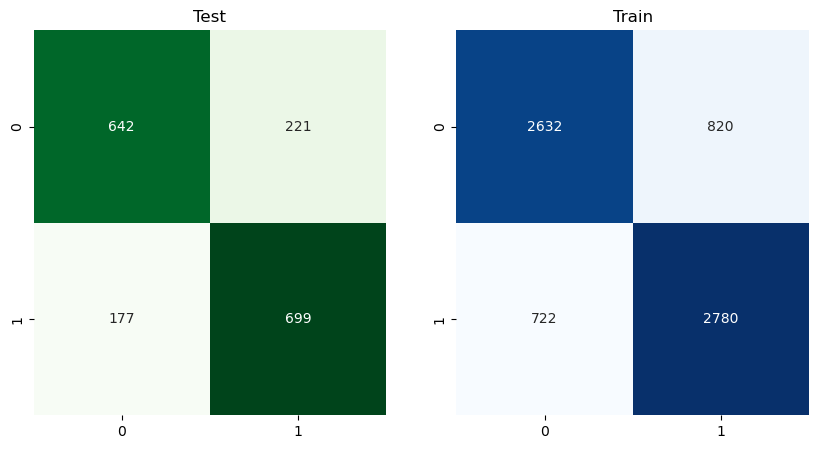

In [71]:
#Grafico la matriz de confusión

fig, ax = plt.subplots(nrows = 1,
                      ncols = 2,
                      figsize = (10,5)) 

sns.heatmap(confusion_test, 
            annot=True, fmt='d', cmap='Greens', cbar=False, 
            ax=ax[0])
ax[0].set_title('Test')

sns.heatmap(confusion_train, 
            annot=True, fmt='d', cmap='Blues', cbar=False, 
            ax=ax[1])
ax[1].set_title('Train')

plt.show()

In [72]:
#Capturo datos de la Confusion Matrix, para calcular las metricas.
total_test = sum(sum(confusion_test))
total_train = sum(sum(confusion_train))
TP_test = confusion_test[1,1]
TP_train = confusion_train[1,1]
TN_test = confusion_test[0,0]
TN_train = confusion_train[0,0]
FP_test = confusion_test[0,1]
FP_train = confusion_train[0,1]
FN_test = confusion_test[1,0]
FN_train = confusion_train[1,0]


In [73]:
#Chequeo haber indicado corectamente las posiciones de la matriz.
print(f"TP: {TP_test}/{TP_train} TN: {TN_test}/{TN_train} FP: {FP_test}/{FP_train} FN: {FN_test}/{FN_train}")

TP: 699/2780 TN: 642/2632 FP: 221/820 FN: 177/722


In [74]:
# Paso 2: Calculo métricas

Ps_test = TP_test / (TP_test + FP_test)
Ps_train = TP_train / (TP_train + FP_train)
Recall_TEST = TP_test / (TP_test + FN_test)
Recall_TRAIN = TP_train / (TP_train + FN_train)
Accurancy_TEST = (TP_test + TN_test) / total_test
Accurancy_TRAIN = (TP_train + TN_train) / total_train
Especificidad_TEST = TN_test / (TN_test + TP_test)
Especificidad_TRAIN = TN_train / (TN_train + TP_train)
F1_score_test = (2*Ps_test*Recall_TEST)/(Ps_test+Recall_TEST)
F1_score_train = (2*Ps_train*Recall_TRAIN)/(Ps_train+Recall_TRAIN)

print("MÉTRICAS:")
print("\n")  
print(f"Accuracy Score en test: {Accurancy_TEST}")
print(f"Accuracy Score en train: {Accurancy_TRAIN}")
print("\n")
print(f"Precision Score en test: {Ps_test}")
print(f"Precision Score en train: {Ps_train}")
print("\n")
print(f"Recall Score en test: {Recall_TEST}")
print(f"Recall Score en train: {Recall_TRAIN}")
print("\n")
print(f"Especificidad en test: {Especificidad_TEST}")
print(f"Especificidad en train: {Especificidad_TRAIN}")
print("\n")
print(f"F1 Score en test: {F1_score_test}")
print(f"F1 score en train: {F1_score_train}")

MÉTRICAS:


Accuracy Score en test: 0.7711328349626222
Accuracy Score en train: 0.7782571182053495


Precision Score en test: 0.7597826086956522
Precision Score en train: 0.7722222222222223


Recall Score en test: 0.797945205479452
Recall Score en train: 0.7938320959451742


Especificidad en test: 0.47874720357941836
Especificidad en train: 0.48632668144863267


F1 Score en test: 0.7783964365256125
F1 score en train: 0.7828780625176007


In [75]:
#Armo un dataframe, donde almacenar los datos de las metricas y poder comprarlas.

metricas_modelo1 = pd.DataFrame(columns=['Poblacion', 'Metrica','Valor'])

# Agrego Precision Score
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Precision Score',
              'Valor': Ps_test}
metricas_modelo1 = metricas_modelo1.append(nuevo_dato, ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Precision Score',
              'Valor': Ps_train}
metricas_modelo1 = metricas_modelo1.append(nuevo_dato, ignore_index=True)

# Agrego Recall Score
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Recall Score',
              'Valor': Recall_TEST}
metricas_modelo1 = metricas_modelo1.append(nuevo_dato, ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Recall Score',
              'Valor': Recall_TRAIN}
metricas_modelo1 = metricas_modelo1.append(nuevo_dato, ignore_index=True)

# Agrego Accurancy Score
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Accurancy Score',
              'Valor': Accurancy_TEST}
metricas_modelo1 = metricas_modelo1.append(nuevo_dato, ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Accurancy Score',
              'Valor': Accurancy_TRAIN}
metricas_modelo1 = metricas_modelo1.append(nuevo_dato, ignore_index=True)

# Agrego Especificidad
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Especificidad',
              'Valor': Especificidad_TEST}
metricas_modelo1 = metricas_modelo1.append(nuevo_dato, ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Especificidad',
              'Valor': Especificidad_TRAIN}
metricas_modelo1 = metricas_modelo1.append(nuevo_dato, ignore_index=True)

#Agrego F1 SCORE
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'F1 Score',
              'Valor': F1_score_test}
metricas_modelo1 = metricas_modelo1.append(nuevo_dato, ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'F1 Score',
              'Valor': F1_score_train}
metricas_modelo1 = metricas_modelo1.append(nuevo_dato, ignore_index=True)

metricas_modelo1

C:\Users\Valeria\AppData\Local\Temp\ipykernel_6336\395964098.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas_modelo1 = metricas_modelo1.append(nuevo_dato, ignore_index=True)
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6336\395964098.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas_modelo1 = metricas_modelo1.append(nuevo_dato, ignore_index=True)
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6336\395964098.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas_modelo1 = metricas_modelo1.append(nuevo_dato, ignore_index=True)
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6336\395964098.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

,Poblacion,Metrica,Valor
0,TEST,Precision Score,0.759783
1,TRAIN,Precision Score,0.772222
2,TEST,Recall Score,0.797945
3,TRAIN,Recall Score,0.793832
4,TEST,Accurancy Score,0.771133
5,TRAIN,Accurancy Score,0.778257
6,TEST,Especificidad,0.478747
7,TRAIN,Especificidad,0.486327
8,TEST,F1 Score,0.778396
9,TRAIN,F1 Score,0.782878


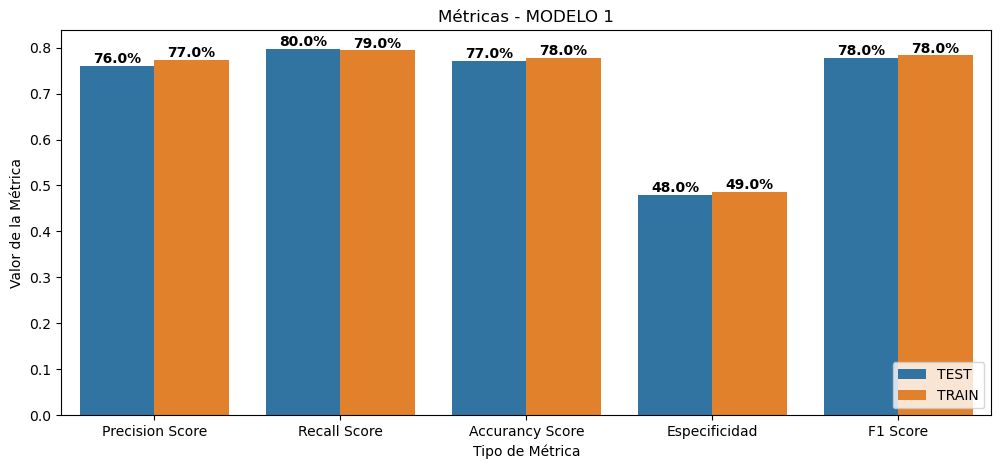

In [76]:
#Grafico metricas

plt.figure(figsize=(12, 5))
sns.barplot(data = metricas_modelo1,
                x = 'Metrica',
                y = 'Valor',
                hue = 'Poblacion')
plt.xlabel('Tipo de Métrica')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas - MODELO 1')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(y_text,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')

plt.legend(loc='lower right')    
metricas_1 = plt.gcf()
plt.show()

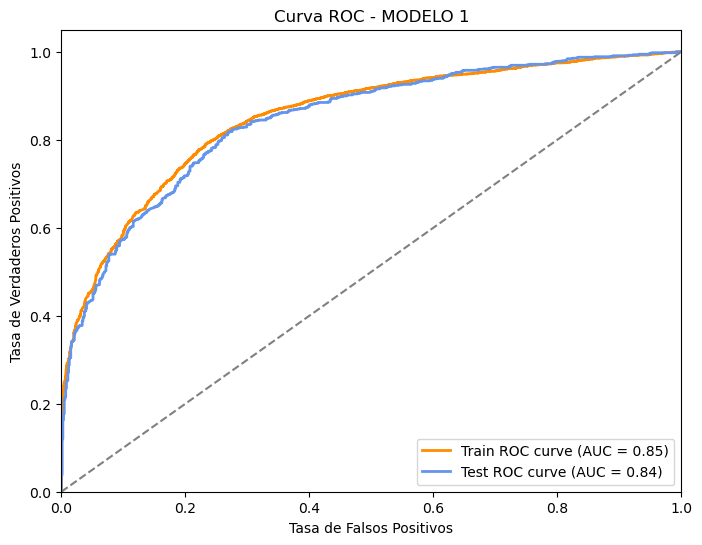

In [77]:
# Curvas de ROC y AUC

train_Y = train['Transported']
train_Y_prob = train['Predict_Prob_RegLog_1']
fpr_train, tpr_train, _ = roc_curve(train_Y, train_Y_prob)
roc_auc_train = auc(fpr_train, tpr_train)

test_Y = test['Transported']
test_Y_prob = test['Predict_Prob_RegLog_1']
fpr_test, tpr_test, _ = roc_curve(test_Y, test_Y_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - MODELO 1')
plt.legend(loc='lower right')
roc_1 = plt.gcf()
plt.show()

 - Teniendo en cuenta las métricas y el valor de la curva RUC y su AUC, el modelo parece ser aceptalbe.
 
 - Debería ver si mejora, quitando predictores que tienen P-values altos, o si al menos excluyendolos obtengo los mismos resultados.
 
 - El modelo responde practicamente igual en tanto en entrenamiento como en testeo, por lo que no parece tener overfitting ni underfitting.
 

---- 

# Modelado con libreria Scikit-Learn
---
>A medida que avanzamos en el curso, fuimos conociendo librerias nuevas, como por ejemplo Sklearn, que a la hora de desarrollar los modelos, ofrecen funciones y metedos que aceleran el proceso constructivo. Es por eso que me incliné por continuar el proyecto modelando con esta libreria.

>El objetivo será comparar las métricas, analizar que modelo es mas efectivo utilizando las mismas variables, para luego aplicar hiperparametros y finalmente obtener el mejor resultado posible.

##### 1- Primero defino cuales van a ser los predictores y cual es el target, para alimentar a los modelos.

In [78]:
X = train_df.drop(columns=["Transported"]) #Predictores
y = train_df[["Transported"]] #Variable Target.

#####  2- Escalar variables

>Algunos modelos necesitan normalizar las varialbes, ya que a la hora de calcular los
coeficientes no es lo mismo si una variable toma valores entre 0 y 1, que si toma valores entre
-1000 y 100000. Por lo tantos, buscamos que los datos esten entre 0 y 1 y tengan media 0 y desviacion estandard 1, que es justamente lo que hace el StandardScaler.

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #Predictores de test normalizados. 
test_df_scaled = scaler.fit_transform(test_df) #aplica Scaler a todo el DF de la muestra ciega.

#####  3- Aplico Split en ambos dataframes, el original y el escalado.

In [80]:
#Separo el dataframe en test y train.
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#Hago lo mismo con las variables nomralizadas
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

 #####  4- Creo funcion para entrenar los medelos y a la vez, calculará  las metricas, matriz de confución,  Roc/Auc, almacenar las resultados en una tabla y poder graficar para comparar.

In [81]:
#Armo lista para almacenar los resultados y luego poder compararlos.
Algoritmo = []
accuracy_train = []
accuracy_test = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []
AUC_train = []
AUC_test =[]

- Función para modelos que __NO__ requieren las variables normalizadas:

In [82]:
def modelo(model): #Defino la función.
    model.fit(x_train,y_train) #entrena el modelo indicado en el argumento de la función.
    x_train_pred = model.predict(x_train) #Prediccion de clase para train (0 o 1)
    x_test_pred = model.predict(x_test) #Prediccion de clase para test (0 o 1)
    x_train_proba = model.predict_proba(x_train)[:, 1] #Prediccion de probabilidad para train.
    x_test_proba = model.predict_proba(x_test)[:, 1] #Prediccion de probabilidad para train.
    
    '''sklearn entrega la probabilidad en una array de dos dimensiones, la probabilidad de que 
    suceda cada clase, por eso hay que limitar el array a toda la columna 1 donde esta la
    de la clase positiva, y así poder calcular el roc y auc, que requieren de este dato.'''
    
    #Cálculo de metricas incluidas en la librería:
    
    a = round(accuracy_score(y_train,x_train_pred)*100, 2)
    b = round(accuracy_score(y_test,x_test_pred)*100, 2)
    c = round(precision_score(y_train,x_train_pred)*100, 2)
    d = round(precision_score(y_test,x_test_pred)*100, 2)
    e = round(recall_score(y_train,x_train_pred)*100, 2)
    f = round(recall_score(y_test,x_test_pred)*100, 2)
    g = round(f1_score(y_train,x_train_pred)*100, 2)
    h = round(f1_score(y_test,x_test_pred)*100, 2)
    
    #Imprime métricas:

    print("Metricas:")
    print(f"Accuracy Score del modelo {model} sobre Train es:",a)
    print(f"Accuracy Score del modelo {model} sobre Test es:",b)
    print(" ")
    print(f"Precision Score de modelo {model} sobre Train es:",c)
    print(f"Precision Score de modelo {model} sobre Test es:",d)
    print(" ")
    print(f"Recall Score del modelo {model} sobre Train es:",e)
    print(f"Recall Score del modelo {model} sobre Test es:",f)
    print(" ")
    print(f"F1 Score del modelo {model} sobre Train es:",g)
    print(f"F1 Score del modelo {model} sobre Test es:",h)
    print(" ")
    print("\n")
    
    #Calcula Matriz de Confusión, imprime y grafica resultado:

    print(f"Confusion Matrix del modelo {model} es:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    #Calcula Roc y Auc, utulizando las probabilidades que entregó el modelo.   
    #Para train:
    fpr_tr, tpr_tr, _ = roc_curve(y_train, x_train_proba)
    roc_auc_train = auc(fpr_tr, tpr_tr)
    #Para test:
    fpr_te, tpr_te, _ = roc_curve(y_test, x_test_proba)
    roc_auc_test = auc(fpr_te, tpr_te)

    #Grafica ROC y muestra valores de AUC, tanto para test como para train:

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_tr, tpr_tr, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_te, tpr_te, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - MODELO 1')
    plt.legend(loc='lower right')
    roc_1 = plt.gcf()
    plt.show()   

    #Agrega metricas a las listas

    accuracy_train.append(a)
    accuracy_test.append(b)
    precision_train.append(c)
    precision_test.append(d)
    recall_train.append(e)
    recall_test.append(f)
    f1_train.append(g)
    f1_test.append(h)
    AUC_train.append(roc_auc_train)
    AUC_test.append(roc_auc_test)
#Fin de la función.    

- Función para modelos que requieren las variables normalizadas:

In [83]:
def modelo_scaled(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    x_train_proba1 = model.predict_proba(x_train1)[:, 1]
    x_test_proba1 = model.predict_proba(x_test1)[:, 1]
    
    a = round(accuracy_score(y_train,x_train_pred1)*100, 2)
    b = round(accuracy_score(y_test,x_test_pred1)*100, 2)
    c = round(precision_score(y_train,x_train_pred1)*100, 2)
    d = round(precision_score(y_test,x_test_pred1)*100, 2)
    e = round(recall_score(y_train,x_train_pred1)*100, 2)
    f = round(recall_score(y_test,x_test_pred1)*100, 2)
    g = round(f1_score(y_train,x_train_pred1)*100, 2)
    h = round(f1_score(y_test,x_test_pred1)*100, 2)
    
    print("Metricas:")
    print(f"Accuracy Score del modelo {model} sobre Train es:",a)
    print(f"Accuracy Score del modelo {model} sobre Test es:",b)
    print(" ")
    print(f"Precision Score de modelo {model} sobre Train es:",c)
    print(f"Precision Score de modelo {model} sobre Test es:",d)
    print(" ")
    print(f"Recall Score del modelo {model} sobre Train es:",e)
    print(f"Recall Score del modelo {model} sobre Test es:",f)
    print(" ")
    print(f"F1 Score del modelo {model} sobre Train es:",g)
    print(f"F1 Score del modelo {model} sobre Test es:",h)
    print(" ")
    print("\n")
    print(f"Confusion Matrix del modelo {model} es:")
    
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    fpr_tr, tpr_tr, _ = roc_curve(y_train1, x_train_proba1)
    roc_auc_train = auc(fpr_tr, tpr_tr)
    
    fpr_te, tpr_te, _ = roc_curve(y_test1, x_test_proba1)
    roc_auc_test = auc(fpr_te, tpr_te)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_tr, tpr_tr, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_te, tpr_te, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - MODELO 1')
    plt.legend(loc='lower right')
    roc_1 = plt.gcf()
    plt.show()
    
    accuracy_train.append(a)
    accuracy_test.append(b)
    precision_train.append(c)
    precision_test.append(d)
    recall_train.append(e)
    recall_test.append(f)
    f1_train.append(g)
    f1_test.append(h)
    AUC_train.append(roc_auc_train)
    AUC_test.append(roc_auc_test)

##### 5 - Utilizo las fuciones, para modelar usando los algortimos de machine learning mas populares, en esta primera parte no les elegiré parametros, sino que correran con los parametros por defecto, una vez realizada la comparación, se eligirán los de mejor rendimiento para optimizarlos.

- Modelos con dataframe sin escalar:

Metricas:
Accuracy Score del modelo DecisionTreeClassifier() sobre Train es: 96.74
Accuracy Score del modelo DecisionTreeClassifier() sobre Test es: 74.3
 
Precision Score de modelo DecisionTreeClassifier() sobre Train es: 97.04
Precision Score de modelo DecisionTreeClassifier() sobre Test es: 74.13
 
Recall Score del modelo DecisionTreeClassifier() sobre Train es: 96.46
Recall Score del modelo DecisionTreeClassifier() sobre Test es: 75.23
 
F1 Score del modelo DecisionTreeClassifier() sobre Train es: 96.75
F1 Score del modelo DecisionTreeClassifier() sobre Test es: 74.67
 


Confusion Matrix del modelo DecisionTreeClassifier() es:


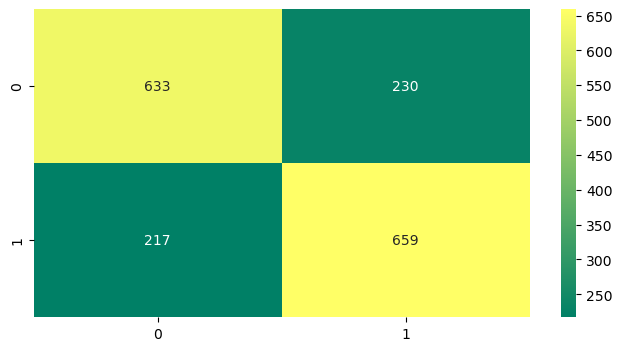

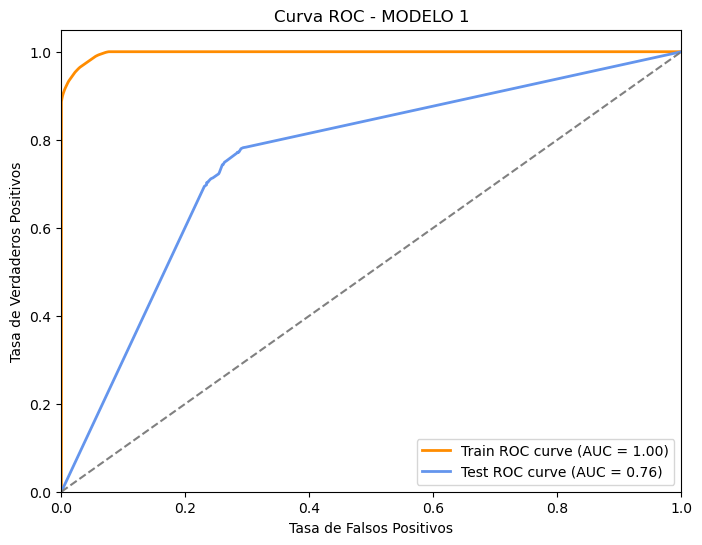

In [84]:
#Modelo de Arbol decisión.
modelo(DecisionTreeClassifier())
Algoritmo.append('DecisionTreeClassifier')

>- Notable sobre ajuste en train, con un AUC de 1, y 0,75 en test.
>- La acuracy en test, es de 73%, menor al del primero modelo con reg. logisitca de statsmodel. 

C:\Users\Valeria\AppData\Local\Temp\ipykernel_6336\1998357871.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train) #entrena el modelo indicado en el argumento de la función.


Metricas:
Accuracy Score del modelo RandomForestClassifier() sobre Train es: 96.74
Accuracy Score del modelo RandomForestClassifier() sobre Test es: 78.55
 
Precision Score de modelo RandomForestClassifier() sobre Train es: 95.75
Precision Score de modelo RandomForestClassifier() sobre Test es: 79.62
 
Recall Score del modelo RandomForestClassifier() sobre Train es: 97.86
Recall Score del modelo RandomForestClassifier() sobre Test es: 77.17
 
F1 Score del modelo RandomForestClassifier() sobre Train es: 96.79
F1 Score del modelo RandomForestClassifier() sobre Test es: 78.38
 


Confusion Matrix del modelo RandomForestClassifier() es:


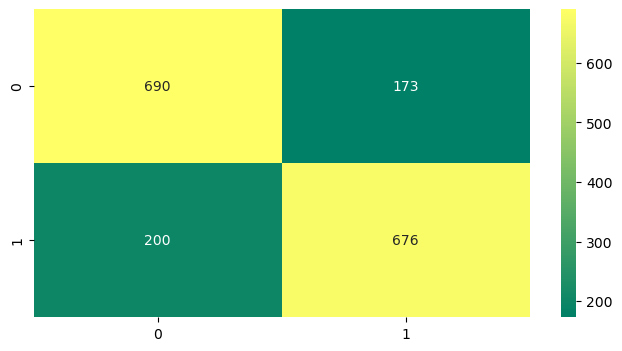

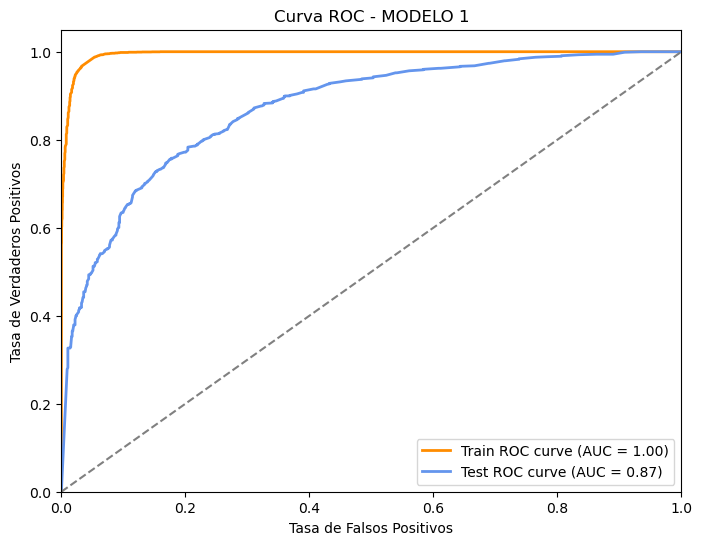

In [85]:
#Modelo Random Forest.
modelo(RandomForestClassifier())
Algoritmo.append('RandomForestClassifier')

>- Tambien, sobreajustedo en train, con un AUC de 0.99 pero en este caso 0,87 en test, mucho mejor.
>- La acuracy en test, es de 79,6%, mejor respecto al modelo anterior, tal vez mejorable con hypermarametros. 
>- El Precision Score en test de 81,2%, tambien es un buen dato respecto a la perfomance de este modelo.

C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metricas:
Accuracy Score del modelo AdaBoostClassifier() sobre Train es: 79.7
Accuracy Score del modelo AdaBoostClassifier() sobre Test es: 79.01
 
Precision Score de modelo AdaBoostClassifier() sobre Train es: 77.43
Precision Score de modelo AdaBoostClassifier() sobre Test es: 76.15
 
Recall Score del modelo AdaBoostClassifier() sobre Train es: 84.24
Recall Score del modelo AdaBoostClassifier() sobre Test es: 84.93
 
F1 Score del modelo AdaBoostClassifier() sobre Train es: 80.69
F1 Score del modelo AdaBoostClassifier() sobre Test es: 80.3
 


Confusion Matrix del modelo AdaBoostClassifier() es:


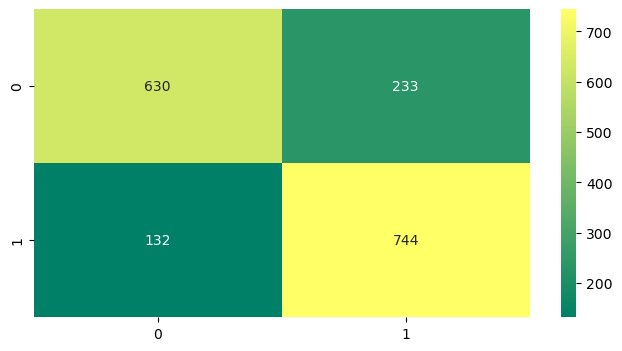

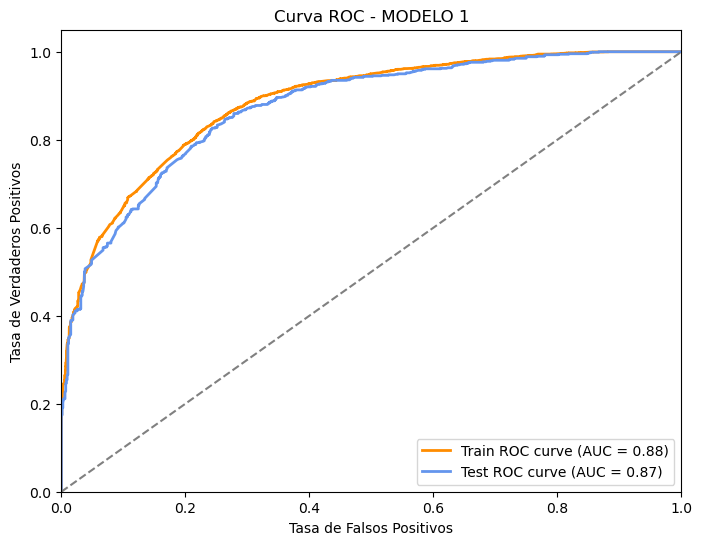

In [86]:
#Modelo de Boosting Adaptativo, mejora resultados de clasificadores débiles.
modelo(AdaBoostClassifier())
Algoritmo.append('AdaBoostClassifier')

>- Respecto al AUC, muy parejo en ambos dataframe, por lo tanto, podemos decir que no hay sobre ajustes en este modelo.
>- Tampoco se nota sobreajuste al mirar el Accuracy Score, siendo 79.1 para test, algo inferior a Random Forest, pero mejor que los primeros.

C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metricas:
Accuracy Score del modelo GradientBoostingClassifier() sobre Train es: 81.67
Accuracy Score del modelo GradientBoostingClassifier() sobre Test es: 78.9
 
Precision Score de modelo GradientBoostingClassifier() sobre Train es: 79.86
Precision Score de modelo GradientBoostingClassifier() sobre Test es: 76.65
 
Recall Score del modelo GradientBoostingClassifier() sobre Train es: 85.04
Recall Score del modelo GradientBoostingClassifier() sobre Test es: 83.56
 
F1 Score del modelo GradientBoostingClassifier() sobre Train es: 82.37
F1 Score del modelo GradientBoostingClassifier() sobre Test es: 79.96
 


Confusion Matrix del modelo GradientBoostingClassifier() es:


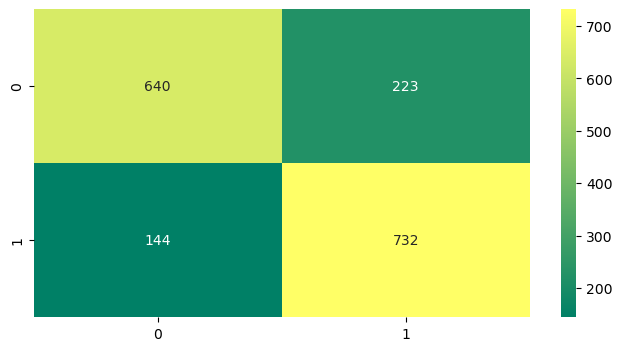

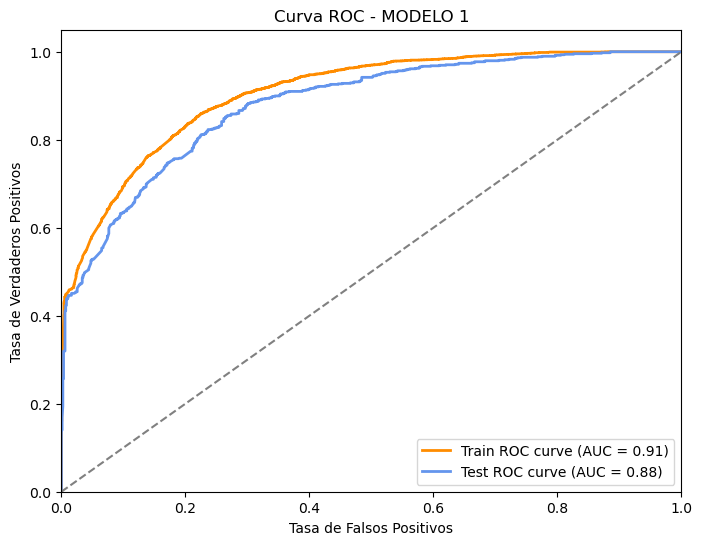

In [87]:
#Modelo de ensable GrandientBoosting
modelo(GradientBoostingClassifier())
Algoritmo.append('GradientBoostingClassifier')

>- Parecido al modelo anterior, sin sobreajustes marcados, accuracy en test cerana a 79%

C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\Valeria\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Valeria\miniconda3\Lib\site-packages\joblib\exte

[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1656
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
Metricas:
Accuracy Score del modelo LGBMClassifier() sobre Train es: 87.42
Accuracy Score del modelo LGBMClassifier() sobre Test es: 79.53
 
Precision Score de modelo LGBMClassifier() sobre Train es: 85.51
Precision Score de modelo LGBMClassifier() sobre Test es: 78.02
 
Recall Score del modelo LGBMClassifier() sobre Train es: 90.32
Recall Score del modelo LGBMClassifier() sobre Test es: 82.65
 
F1 Score del modelo LGBMClassifier() sobre Train

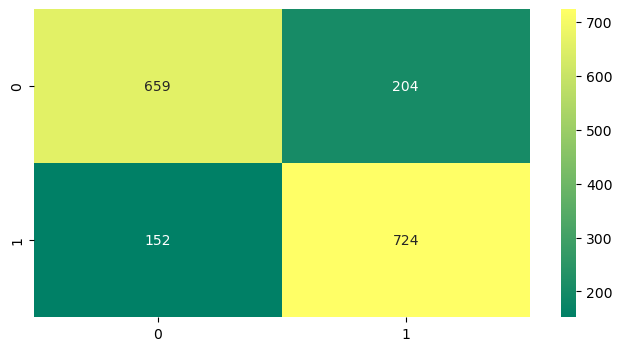

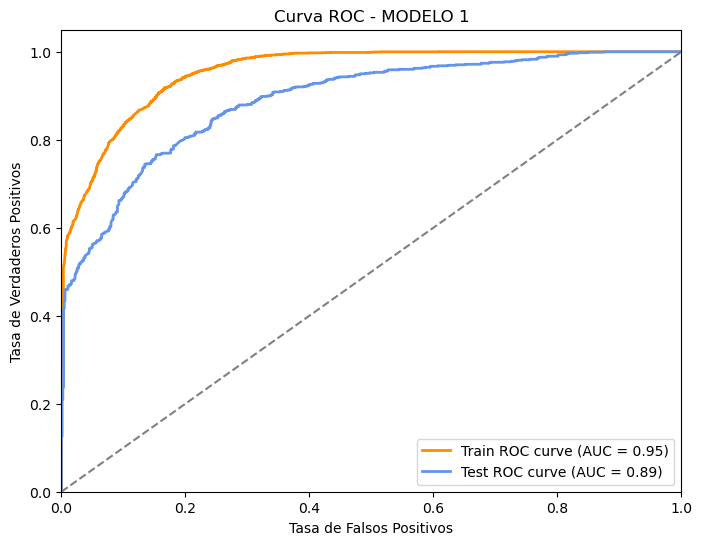

In [88]:
#Modelo de ensabmle, tambien basado en arboles de decisión.
modelo(LGBMClassifier())
Algoritmo.append('LGBMClassifier')

>- Levemente sobre ajustado en train.
>- Accuracy en test alineada a a los otros modelos de ensamble y boosting, entre 79% y 80%
>- Tambien, candidato a ser mejorado aplicando hyperparametros.

Metricas:
Accuracy Score del modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) sobre Train es: 91.59
Accuracy Score del modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None,

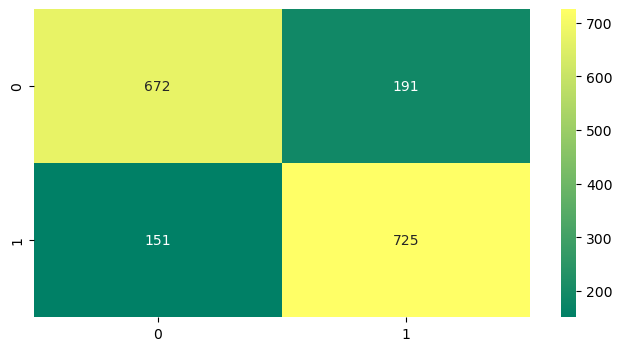

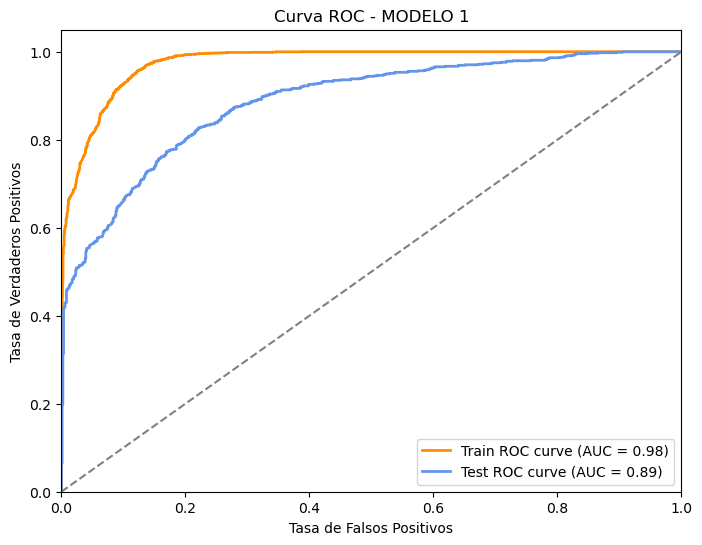

In [89]:
#Modelo de Extremo de Gradientboost, utiliza los resultados de arboles de decisón y maximizar el aprendizaje
modelo(XGBClassifier())
Algoritmo.append('XGBClassifier')

>- 80.33% de Accuracy score en test, el mejor hasta este punto.
>- Es cierto, que viendo el resultado en train, notamos sobre ajustes, 91.59% de accuracy y 0.98 de Auc.
>- Con hyperparametros se podran subsanar estos sobreajustes y tener resultados parejos para ambos dataframes.

Metricas:
Accuracy Score del modelo <catboost.core.CatBoostClassifier object at 0x0000011747F68B10> sobre Train es: 86.19
Accuracy Score del modelo <catboost.core.CatBoostClassifier object at 0x0000011747F68B10> sobre Test es: 80.62
 
Precision Score de modelo <catboost.core.CatBoostClassifier object at 0x0000011747F68B10> sobre Train es: 84.61
Precision Score de modelo <catboost.core.CatBoostClassifier object at 0x0000011747F68B10> sobre Test es: 79.14
 
Recall Score del modelo <catboost.core.CatBoostClassifier object at 0x0000011747F68B10> sobre Train es: 88.72
Recall Score del modelo <catboost.core.CatBoostClassifier object at 0x0000011747F68B10> sobre Test es: 83.56
 
F1 Score del modelo <catboost.core.CatBoostClassifier object at 0x0000011747F68B10> sobre Train es: 86.62
F1 Score del modelo <catboost.core.CatBoostClassifier object at 0x0000011747F68B10> sobre Test es: 81.29
 


Confusion Matrix del modelo <catboost.core.CatBoostClassifier object at 0x0000011747F68B10> es:


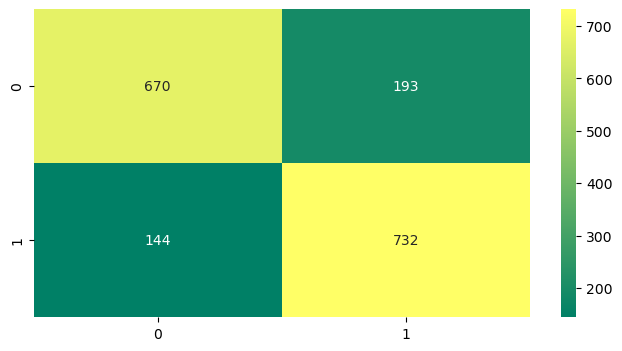

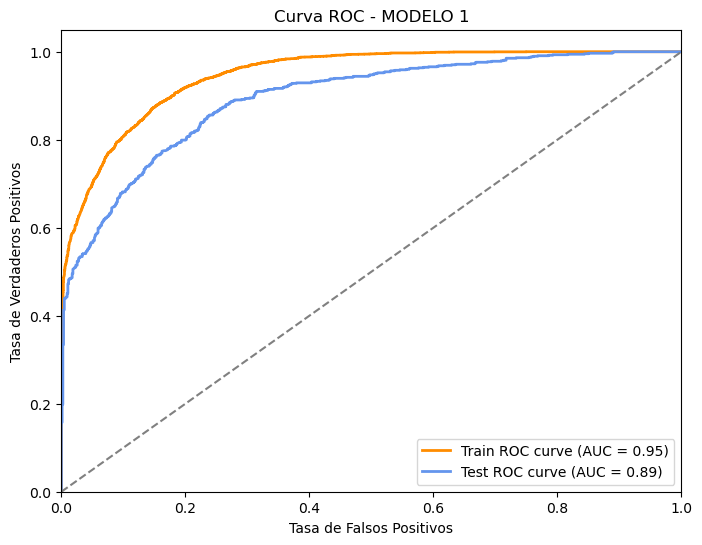

In [90]:
#CatBoost, Modelo de ensamble con predicciones precisas, minimiza el sobreajuste. 
modelo(CatBoostClassifier(verbose=False))
Algoritmo.append('CatBoostClassifier')

>- El Accuracy mejoro un poco respecto a XGBoost, también bajó el AUC en train, acercandose al valor de test, por lo que si bien algo de sobreajuste hay, el modelo se muestra como posiblñe candidato a estar entre los de mejor rendimiento ante este set de datos, y predictores seleccionados.

- Modelos con dataframe normalizado:

Metricas:
Accuracy Score del modelo LogisticRegression() sobre Train es: 77.85
Accuracy Score del modelo LogisticRegression() sobre Test es: 77.11
 
Precision Score de modelo LogisticRegression() sobre Train es: 77.27
Precision Score de modelo LogisticRegression() sobre Test es: 75.98
 
Recall Score del modelo LogisticRegression() sobre Train es: 79.38
Recall Score del modelo LogisticRegression() sobre Test es: 79.79
 
F1 Score del modelo LogisticRegression() sobre Train es: 78.31
F1 Score del modelo LogisticRegression() sobre Test es: 77.84
 


Confusion Matrix del modelo LogisticRegression() es:


C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


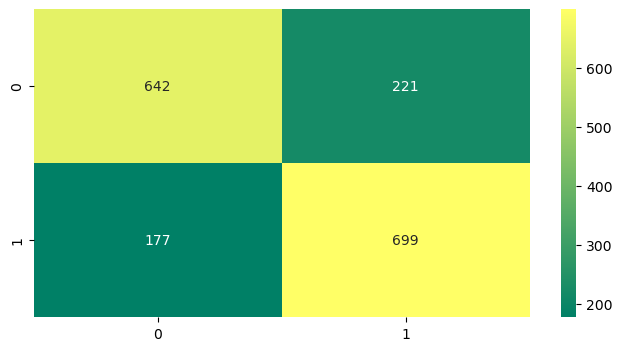

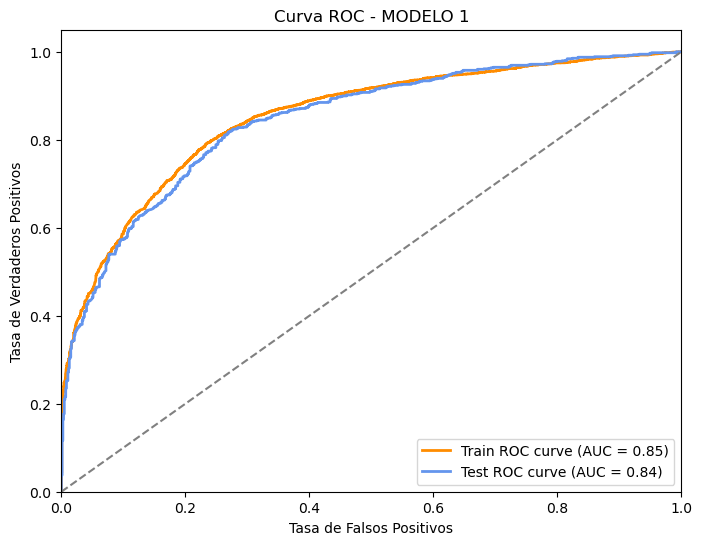

In [91]:
#Regresión logistica, esta vez con libreria de sklearn.
modelo_scaled(LogisticRegression())
Algoritmo.append('LogisticRegression')

>- Los resultados sob practicamente iguales a los obtenidos con el mismo modelo, pero de la librearía statsmodels.
>- Sin sobreajustes, pero no llega al puntaje de Accuracy que obtuvieron los modelos anteriores.

C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Metricas:
Accuracy Score del modelo KNeighborsClassifier() sobre Train es: 82.33
Accuracy Score del modelo KNeighborsClassifier() sobre Test es: 74.41
 
Precision Score de modelo KNeighborsClassifier() sobre Train es: 84.06
Precision Score de modelo KNeighborsClassifier() sobre Test es: 75.62
 
Recall Score del modelo KNeighborsClassifier() sobre Train es: 80.1
Recall Score del modelo KNeighborsClassifier() sobre Test es: 72.6
 
F1 Score del modelo KNeighborsClassifier() sobre Train es: 82.03
F1 Score del modelo KNeighborsClassifier() sobre Test es: 74.08
 


Confusion Matrix del modelo KNeighborsClassifier() es:


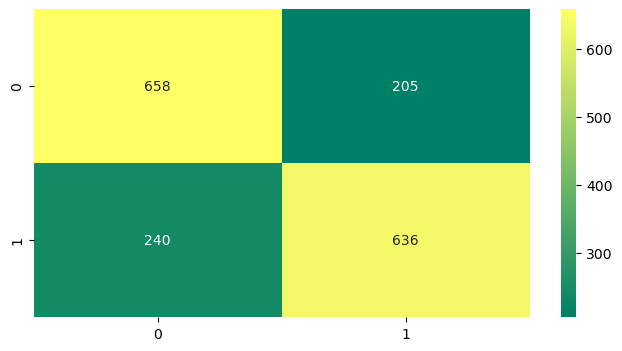

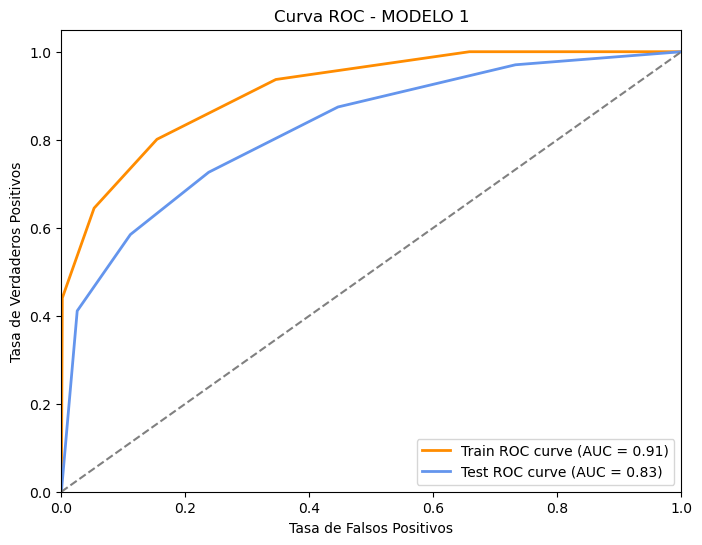

In [92]:
# Modelo KKN - Vecinos Cercanos.
modelo_scaled(KNeighborsClassifier())
Algoritmo.append('KNeighborsClassifier')

>- Segun AUC, notamos un leve sobreajuste en train.
>- El Accuracy Score, es de los mas bajos obtenidos.

Metricas:
Accuracy Score del modelo GaussianNB() sobre Train es: 73.8
Accuracy Score del modelo GaussianNB() sobre Test es: 73.09
 
Precision Score de modelo GaussianNB() sobre Train es: 78.77
Precision Score de modelo GaussianNB() sobre Test es: 77.57
 
Recall Score del modelo GaussianNB() sobre Train es: 65.68
Recall Score del modelo GaussianNB() sobre Test es: 65.53
 
F1 Score del modelo GaussianNB() sobre Train es: 71.63
F1 Score del modelo GaussianNB() sobre Test es: 71.04
 


Confusion Matrix del modelo GaussianNB() es:


C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


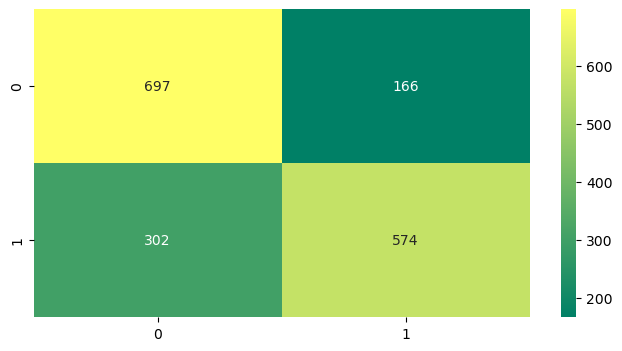

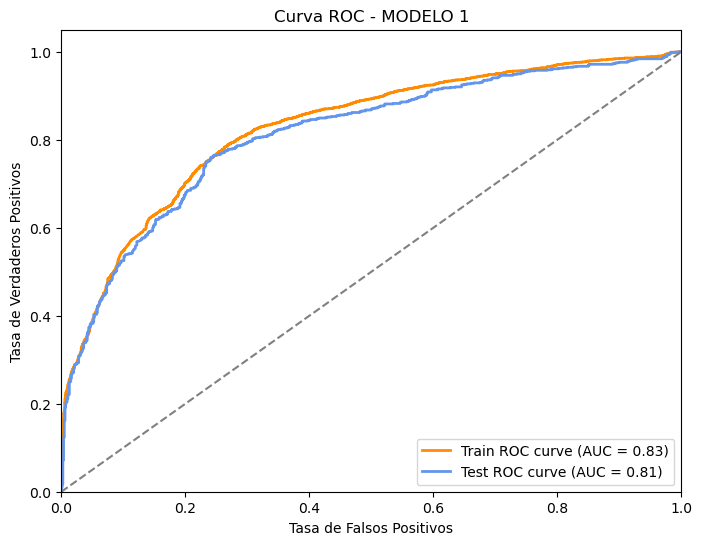

In [93]:
#Modelo Naive Bayes, se caracteriza por ser simple y rapido, ideal para dataset muy grandes.
modelo_scaled(GaussianNB())
Algoritmo.append('GaussianNB')

>- Este modelo resultó tener el Accuracy Score mas bajo, probablemnte no sea el indicado por la cantidad de registros deataframe, o por los predictores seleccionados.
>- No sobreajustó, pero no logro buen rendimiento.

##### 6- Resumen de las métricas obtenidas, y selección de algoritmos que pasan a etapa de hyperparametros.

 - Armo el dataframe con todas las métricas almacenadas en la listas, por la funciones "modelo".

In [94]:
METRICAS = pd.DataFrame({"Algoritmo": Algoritmo,
                   "Accuracy train": accuracy_train,
                   "Accuracy test": accuracy_test,
                   "Precision train": precision_train,
                   "Precision test": precision_test,
                   "Recall train": recall_train,
                   "Recall test": recall_test,
                   "F1 train": f1_train,
                   "F1 test": f1_test,
                   "AUC train": AUC_train,
                   "AUC test": AUC_test})
METRICAS.style.\
    highlight_max(color = 'red').\
    highlight_min(color = 'green')

,Algoritmo,Accuracy train,Accuracy test,Precision train,Precision test,Recall train,Recall test,F1 train,F1 test,AUC train,AUC test
0,DecisionTreeClassifier,96.740000,74.300000,97.040000,74.130000,96.460000,75.230000,96.750000,74.670000,0.997416,0.756036
1,RandomForestClassifier,96.740000,78.550000,95.750000,79.620000,97.860000,77.170000,96.790000,78.380000,0.995011,0.871376
2,AdaBoostClassifier,79.700000,79.010000,77.430000,76.150000,84.240000,84.930000,80.690000,80.300000,0.884088,0.873701
3,GradientBoostingClassifier,81.670000,78.900000,79.860000,76.650000,85.040000,83.560000,82.370000,79.960000,0.905216,0.879255
4,LGBMClassifier,87.420000,79.530000,85.510000,78.020000,90.320000,82.650000,87.850000,80.270000,0.954677,0.889250
5,XGBClassifier,91.590000,80.330000,89.300000,79.150000,94.630000,82.760000,91.890000,80.920000,0.975494,0.886302
6,CatBoostClassifier,86.190000,80.620000,84.610000,79.140000,88.720000,83.560000,86.620000,81.290000,0.946012,0.893668
7,LogisticRegression,77.850000,77.110000,77.270000,75.980000,79.380000,79.790000,78.310000,77.840000,0.851536,0.844343
8,KNeighborsClassifier,82.330000,74.410000,84.060000,75.620000,80.100000,72.600000,82.030000,74.080000,0.912306,0.825276
9,GaussianNB,73.800000,73.090000,78.770000,77.570000,65.680000,65.530000,71.630000,71.040000,0.826005,0.811592


> - CatBoostClassifier tuvo mejor rendimiento, Accuracy Score y Auc mas alto en test. En train resultaron mayores por lo que hay un poco de sobre ajsute a corregir.

>- Le siguen XGBoost, LGBM, también RandomForest, aunque este sobre ajustó demasiado en test.

>- Los modelos con menor rendimiento fueron GaussianNB y KNN.

- Grafico las Accuracy y Auc, para compararlos de manera visual.

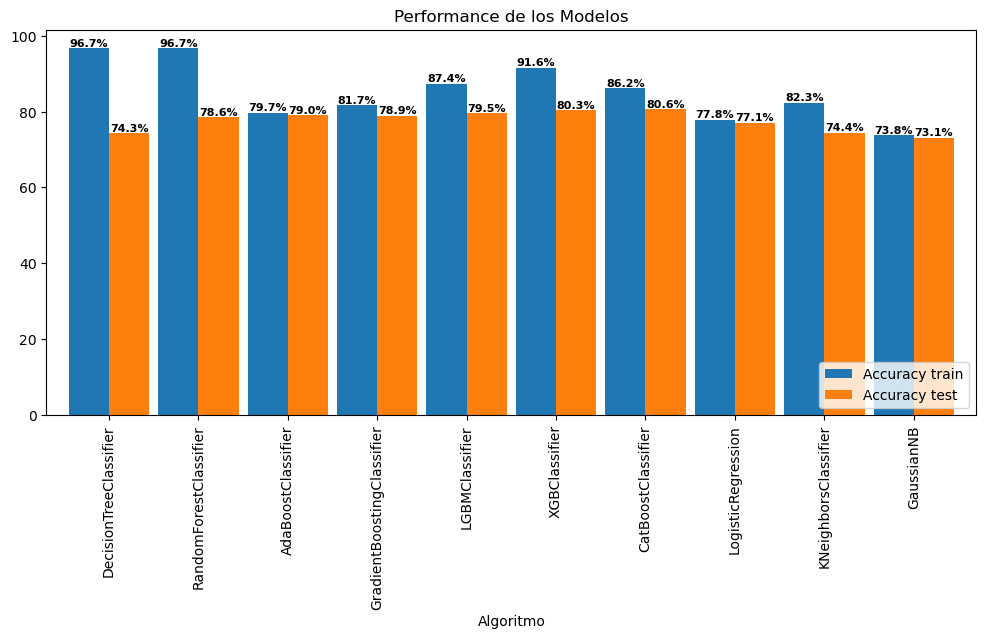

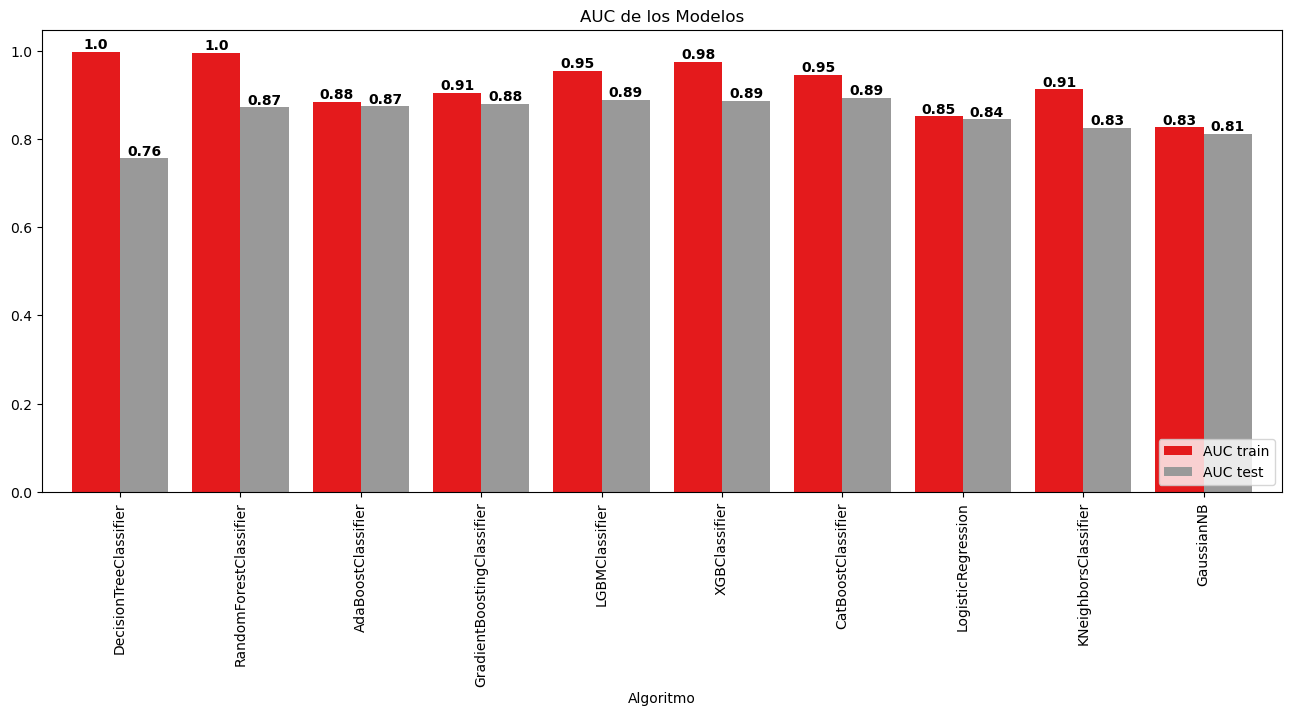

In [95]:
METRICAS.plot(x = "Algoritmo",
              y = ["Accuracy train","Accuracy test"],
              figsize = (12,5),
              kind = "bar",
              width =0.9,
              title = "Performance de los Modelos")
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(y_text,1))}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 8, color = 'black', fontweight = 'bold')
plt.legend(loc='lower right')   

METRICAS.plot(x = "Algoritmo",
              y = ["AUC train","AUC test"],
              figsize = (16,6),
              kind = "bar",
              title = "AUC de los Modelos",
              width =0.8,
              colormap = 'Set1')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  
    y_text = p.get_height()  
    ax.text(x_text, y_text, str(round(y_text,2)), 
            ha = 'center', 
            va = 'bottom',  
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.legend(loc='lower right')

plt.show()

>- Podemos apreciar claramente los modelos que mas han sobre ajustado en train, respecto a test, aquellos que tuvieron rendimientos muy superiores en su etapa de entrenamiento.

# Hyper-parametros
****
- Eligiré mediante GridSearchCV, los mejores parametros para los modelos con mejor perfomance segun análisis anterior.

- Primero CatBoost, que fue el que mejor lo hizo:

In [96]:
Modelo1 = CatBoostClassifier(verbose=False) #Defino modelo en variable
#Creo variabe con diccionario, para los posibles parametros a aplicar:
Parametro1 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7], 
              "random_state":[0,42,48,50],
               "depth":[8,9,10],
               "iterations":[35,40,50]}

In [97]:
grid_search1 = GridSearchCV(Modelo1, Parametro1, cv=5, n_jobs=-1) #defino varialbe para usar con el .fit

In [98]:
grid_search1.fit(x_train,y_train) #Entrena el modelo con todos los parametros indicados anteriormente.

C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
17 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Valeria\miniconda3\Lib\site-packages\catboost\core.py", line 5201, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\Valeria\miniconda3\Lib\site-packages\catboost\core.py",

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000011749CA9810>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]})

In [99]:
grid_search1.best_score_ #mejor puntaje obtenido.

0.8038540669980192

In [100]:
best1 = grid_search1.best_params_ #Guardo en variable los mejores parametros
best1

{'depth': 9, 'iterations': 50, 'learning_rate': 0.1, 'random_state': 42}

In [101]:
Modelo1 = CatBoostClassifier(**best1,verbose=False) #Sobrescribo la variable, para luego utilizar los mejeres parametros.

Metricas:
Accuracy Score del modelo <catboost.core.CatBoostClassifier object at 0x000001174A12BB10> sobre Train es: 83.68
Accuracy Score del modelo <catboost.core.CatBoostClassifier object at 0x000001174A12BB10> sobre Test es: 79.93
 
Precision Score de modelo <catboost.core.CatBoostClassifier object at 0x000001174A12BB10> sobre Train es: 81.64
Precision Score de modelo <catboost.core.CatBoostClassifier object at 0x000001174A12BB10> sobre Test es: 77.94
 
Recall Score del modelo <catboost.core.CatBoostClassifier object at 0x000001174A12BB10> sobre Train es: 87.21
Recall Score del modelo <catboost.core.CatBoostClassifier object at 0x000001174A12BB10> sobre Test es: 83.9
 
F1 Score del modelo <catboost.core.CatBoostClassifier object at 0x000001174A12BB10> sobre Train es: 84.33
F1 Score del modelo <catboost.core.CatBoostClassifier object at 0x000001174A12BB10> sobre Test es: 80.81
 


Confusion Matrix del modelo <catboost.core.CatBoostClassifier object at 0x000001174A12BB10> es:


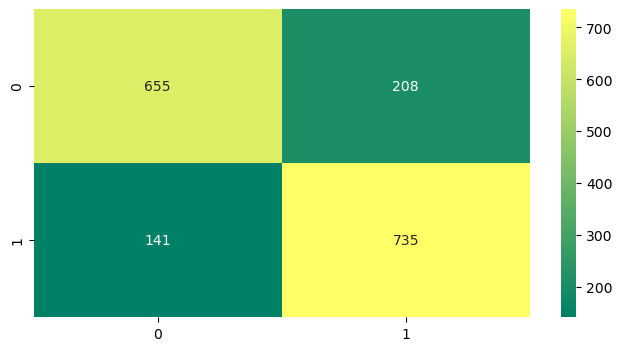

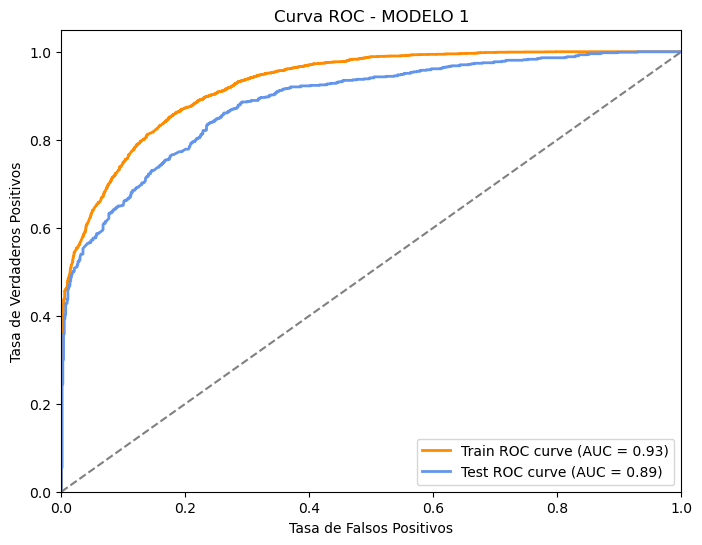

In [102]:
modelo(CatBoostClassifier(**best1, verbose=False)) #Corro la función para modelar, usando los mejores parametros.
Algoritmo.append('CatBoostTunning')

> - Al aplicar hyperparametros sobre este modelo, notamos que no hay tanto sobre ajuste, pero que el Accuracy bajo un poco, respecto al modelo con parametros por defecto.

- Segundo, Francia, nah mentira seguimos con LightGBM.

In [103]:
Modelo2 = LGBMClassifier()
Parametro2 = {"n_estimators":[100,300,500,600,650],
              "learning_rate":[0.01,0.02,0.03],
              "random_state":[0,42,48,50],
               "num_leaves":[16,17,18]}

In [104]:
grid_search2 = GridSearchCV(Modelo2, Parametro2, cv=5, n_jobs=-1)
grid_search2.fit(x_train,y_train.values.ravel())

[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1656
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'n_estimators': [100, 300, 500, 600, 650],
                         'num_leaves': [16, 17, 18],
                         'random_state': [0, 42, 48, 50]})

In [105]:
grid_search2.best_score_

0.8041423539816602

In [106]:
best2 = grid_search2.best_params_
best2

{'learning_rate': 0.02,
 'n_estimators': 600,
 'num_leaves': 18,
 'random_state': 0}

In [107]:
Modelo2 = LGBMClassifier(**best2)

C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1656
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
Metricas:
Accuracy Score del modelo LGBMClassifier(learning_rate=0.02, n_estimators=600, num_leaves=18,
               random_state=0) sobre Train es: 85.48
Accuracy Score del modelo LGBMClassifier(learning_rate=0.02, n_estimators=600, num_leaves=18,
               random_state=0) sobre Test es: 80.74
 
Precision Score de modelo LGBMClassifier(learning_rate=0.02, n_estimators=600, num_leaves=18,
               random_state=0) sobre Train es: 8

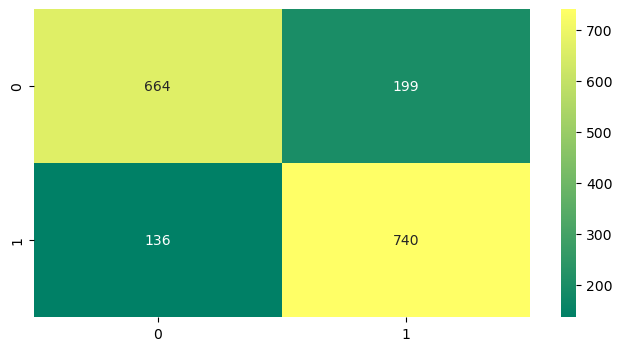

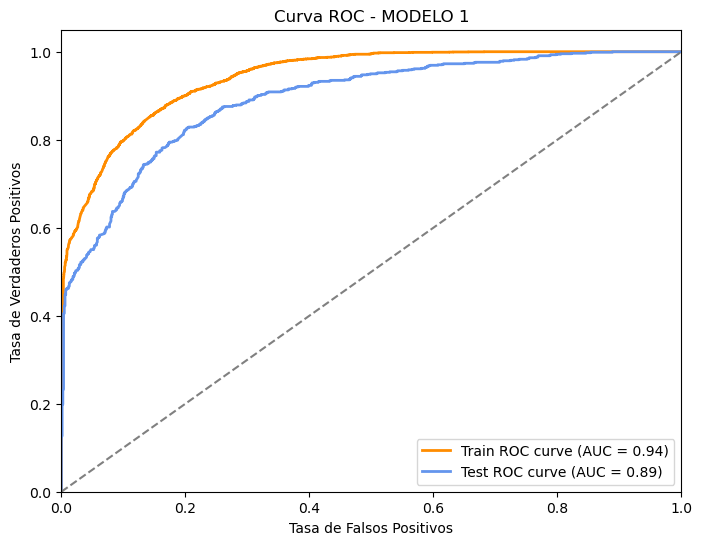

In [108]:
modelo(LGBMClassifier(**best2))
Algoritmo.append('LGBMTunning')

>- en el caso de LGBMClassifier, los "Best Params" mejoraron la Accuracy en train de 79.5% a 80.74% y en test bajó de 87.5% a 85.48% Lo cual redujo algo el sobreajuste en train.
>- Además, baja de 0.95 a 0.94 el auc en train, acercandolo mas al de test.

- Tercero, XGBoost.

In [109]:
Modelo3 = XGBClassifier()
Parametro3 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [110]:
grid_search3 = GridSearchCV(Modelo3, Parametro3 , cv=5, n_jobs=-1)

In [111]:
grid_search3.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42, 50]})

In [112]:
grid_search3.best_score_

0.8015529431235745

In [113]:
best3 = grid_search3.best_params_
best3

{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0}

Metricas:
Accuracy Score del modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...) sobre Train es: 85.39
Accuracy Score del modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, devi

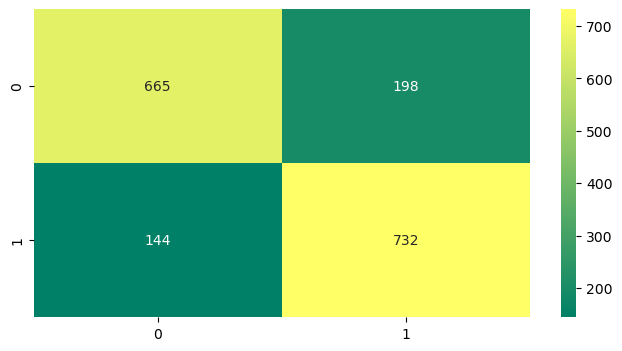

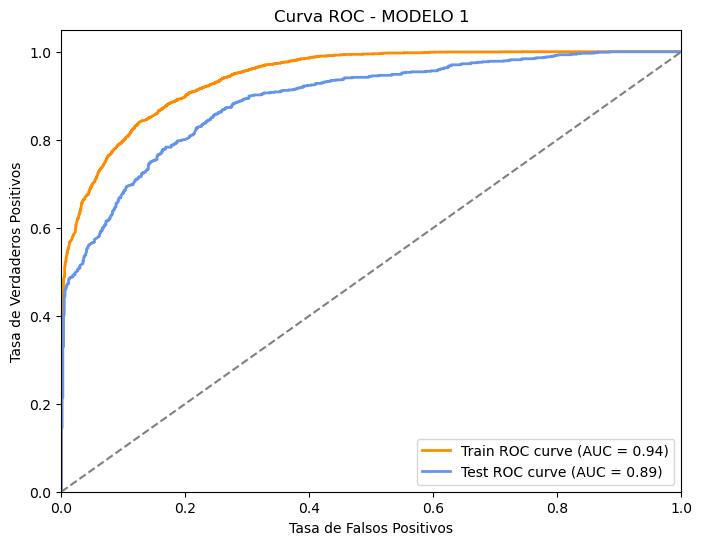

In [114]:
Modelo3 = XGBClassifier(**best3)
modelo(XGBClassifier(**best3))
Algoritmo.append('XGBTunning')

> - En este casó, bajo la Accuracy en Train de 91.59 a 85.39, y se mantuvo en 80.33 la de test. El Auc practicamente no varió.
>- Se podría decir que mejoramos el problema de sobreajuste durante el entrenamiento, pero no varió el resultado en la muestra ciega. 

- Finalmente haremos lo propio con el modelo de Random Forest.

In [115]:
Modelo4 = RandomForestClassifier()
Parametro4 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}

In [116]:
grid_search4 = GridSearchCV(Modelo4, Parametro4, cv=5, n_jobs=-1)

In [117]:
grid_search4.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [118]:
grid_search4.best_score_

0.7993962213406844

In [119]:
best4 = grid_search4.best_params_
best4

{'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 550}

C:\Users\Valeria\AppData\Local\Temp\ipykernel_6336\1998357871.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train) #entrena el modelo indicado en el argumento de la función.


Metricas:
Accuracy Score del modelo RandomForestClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=8,
                       n_estimators=550) sobre Train es: 84.96
Accuracy Score del modelo RandomForestClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=8,
                       n_estimators=550) sobre Test es: 79.59
 
Precision Score de modelo RandomForestClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=8,
                       n_estimators=550) sobre Train es: 84.53
Precision Score de modelo RandomForestClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=8,
                       n_estimators=550) sobre Test es: 78.78
 
Recall Score del modelo RandomForestClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=8,
                       n_estimators=550) sobre Train es: 85.84
Recall Score del modelo RandomForestClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=8,
                       n_estimators=550) sobre Test e

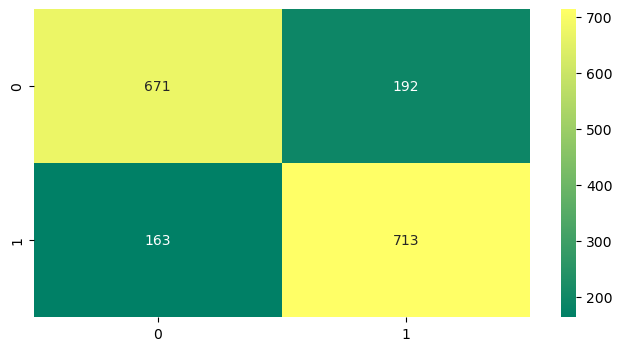

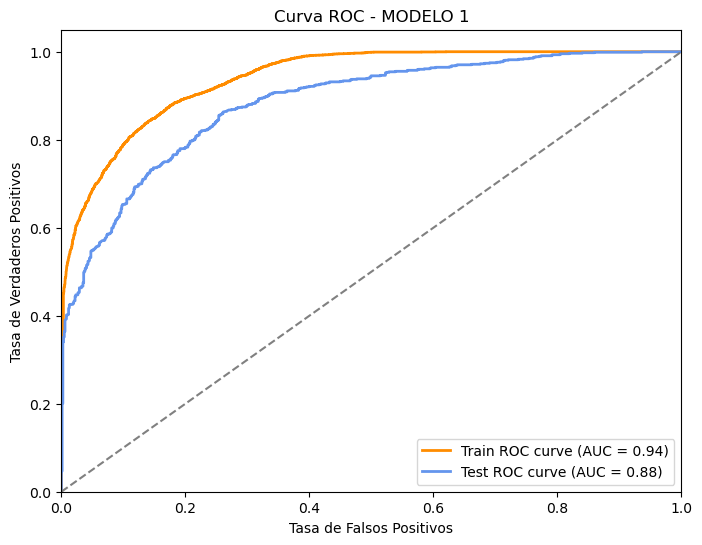

In [120]:
Modelo4 = RandomForestClassifier(**best4)
modelo(RandomForestClassifier(**best4))
Algoritmo.append('RandomForestTunning')

>- Para Random Forest, lo mas llamativo al aplicar mejores parametros, es que  bajo de 0.99 a 0.93 el AUC en Train, y subio de 0.87 a 0.88 en test. Anteriormente estaba muy sobreajustado, ahora mejoró muchisimo. Las curvas ROC se acercaron bastante.
>- Respecto al Accuracy, tambien bajo considerablemente en train, de 96.7 a 83.61, pero en Test bajó de 79.6 a 78.7.
> Si bien disminuyó apenas el puntaje en test, se solucinó de manera considerable el sobreajuste existente en el modelo.

##### 7 - Para potenciar el resultado que obtuvimos individualmente, con los modelos desarollados, haré un modelo de tipo Stacking, y poder combinar las predicciones de ellos en la busqueda de una predicción final. 

In [121]:
Stacking_model = StackingClassifier(estimators=[('CAT Boost', Modelo1), 
                                                ('LGBM', Modelo2),
                                                ("XGBoost", Modelo3),
                                                ('RandomForest', Modelo4)])

C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1656
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
[LightGBM] [Info] Number of positive: 2802, number of negative: 2761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1655
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 22
[LightGBM] [Info] [binary:

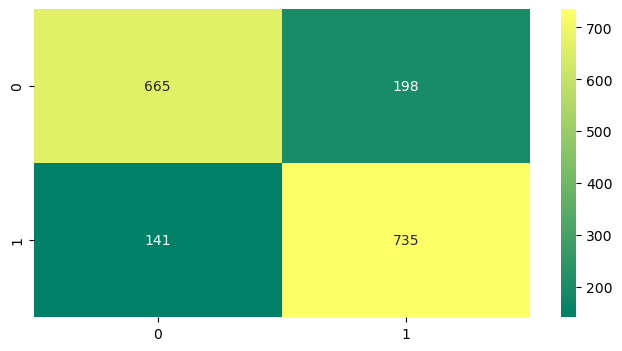

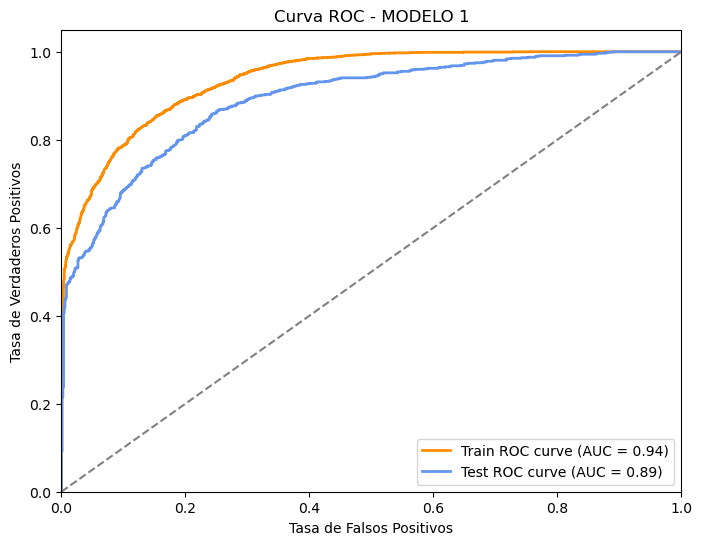

In [122]:
modelo(Stacking_model)
Algoritmo.append('Stacking Model')

In [123]:
METRICAS_BIS = pd.DataFrame({"Algoritmo": Algoritmo,
                   "Accuracy train": accuracy_train,
                   "Accuracy test": accuracy_test,
                   "Precision train": precision_train,
                   "Precision test": precision_test,
                   "Recall train": recall_train,
                   "Recall test": recall_test,
                   "F1 train": f1_train,
                   "F1 test": f1_test,
                   "AUC train": AUC_train,
                   "AUC test": AUC_test})
METRICAS_BIS.style.\
    highlight_max(color = 'red').\
    highlight_min(color = 'green')

,Algoritmo,Accuracy train,Accuracy test,Precision train,Precision test,Recall train,Recall test,F1 train,F1 test,AUC train,AUC test
0,DecisionTreeClassifier,96.740000,74.300000,97.040000,74.130000,96.460000,75.230000,96.750000,74.670000,0.997416,0.756036
1,RandomForestClassifier,96.740000,78.550000,95.750000,79.620000,97.860000,77.170000,96.790000,78.380000,0.995011,0.871376
2,AdaBoostClassifier,79.700000,79.010000,77.430000,76.150000,84.240000,84.930000,80.690000,80.300000,0.884088,0.873701
3,GradientBoostingClassifier,81.670000,78.900000,79.860000,76.650000,85.040000,83.560000,82.370000,79.960000,0.905216,0.879255
4,LGBMClassifier,87.420000,79.530000,85.510000,78.020000,90.320000,82.650000,87.850000,80.270000,0.954677,0.889250
5,XGBClassifier,91.590000,80.330000,89.300000,79.150000,94.630000,82.760000,91.890000,80.920000,0.975494,0.886302
6,CatBoostClassifier,86.190000,80.620000,84.610000,79.140000,88.720000,83.560000,86.620000,81.290000,0.946012,0.893668
7,LogisticRegression,77.850000,77.110000,77.270000,75.980000,79.380000,79.790000,78.310000,77.840000,0.851536,0.844343
8,KNeighborsClassifier,82.330000,74.410000,84.060000,75.620000,80.100000,72.600000,82.030000,74.080000,0.912306,0.825276
9,GaussianNB,73.800000,73.090000,78.770000,77.570000,65.680000,65.530000,71.630000,71.040000,0.826005,0.811592


>- El resultado final del Stacking Model, obtiene 80,51% de Accuracy para Test, y 84%, para train, logrando la mejor relación entre ambos dataframes, para los modelos que superaban el 80%.
>- Tambien, logro ajustar las Curvas ROC, con un auc de 0.93 para Train y 0.89 para Test.

##### 8- Uso el Staking Model entrenado sobre el dataframe de testo.
 >- Lo pongo a modo de darle un cierre al trabajo, ya que no tengo forma de corroborar si lo predicción en el datafreme de testeo, fue correcta o no.
 
 >- Pero sirve  para mostrar que el modelo entrenado, pudo ser perfectamente usar en el datafram de testeo, como se hizo en paralelo el feature engeeniering, y la limpieza de los datos.

In [124]:
pred = Stacking_model.predict(test_df)
pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [125]:
test_df['PRED'] = pred
test_df

,CryoSleep,Age,VIP,RangoEtario,Sin_gastos,Categoria_gastos,Deck,Side,ViajaSolo,CantidadGrupo,...,SpaLog,VRDeckLog,Gastos_totalesLog,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Cancri,Destination_PSO,Destination_TRAPPIST,PRED
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,1,27.0,0,3,1,3,6,1,1,1.0,...,0.000000,0.000000,0.000000,1,0,0,0,0,1,1
0018_01,0,19.0,0,2,0,0,5,1,1,1.0,...,7.945910,0.000000,7.949091,1,0,0,0,0,1,0
0019_01,1,31.0,0,3,1,3,2,1,1,1.0,...,0.000000,0.000000,0.000000,0,1,0,1,0,0,1
0021_01,0,38.0,0,4,0,0,2,1,1,1.0,...,5.204007,6.373320,8.911800,0,1,0,0,0,1,1
0023_01,0,20.0,0,2,0,1,5,1,1,1.0,...,0.000000,0.000000,6.470800,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,1,34.0,0,4,1,3,6,1,0,2.0,...,0.000000,0.000000,0.000000,1,0,0,0,0,1,1
9269_01,0,42.0,0,4,0,2,5,1,1,1.0,...,2.397895,4.976734,6.926577,1,0,0,0,0,1,0
9271_01,1,26.0,0,4,1,3,3,0,1,1.0,...,0.000000,0.000000,0.000000,0,0,1,1,0,0,1


# Conclusión.
***********

>- El dataset contenía variables que por si sola, no tenian tanta relevancia, por lo que se crearon nuevas features que permitieron realziar mejores predicciones

>- El tratamiento realizado sobre los datos, limpieza, manejo de outliers, trataminto de vacios, y otras transformaciones, permitió no tener que descartar información, pudiendo aprovecar todo el dataset.

>- Se utilizaron distitnos algoritmos de clasificación, para obtener las mejores predicciones.

>- LGBMClassifier XGBClassifier CatBoostClassifier RandomForestClassifier, fueron los modelos que mejor resultado obtuvieron, pero mostraban sobreajustes.

>- Mediante el uso de hyper-parametros, se intentó minimizar los sobreajustes, para finalziar el trabajo ensamblando un Stacking model, que aproveche lo mejor de cada uno de ellos.  


# PRUEBAS.
******
> - Pruebas de hyperparametros manuales, en la busqueda de mejores resultados.
> - Lo excluí del resultado final porque no eran superadoras, pero con la intención de seguir desarrollando e investingando tecnicas que permitan conseguir mejores métricas. 

C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metricas:
Accuracy Score del modelo GradientBoostingClassifier(max_depth=9, min_samples_leaf=60,
                           min_samples_split=1200, n_estimators=60,
                           random_state=10, subsample=0.8) sobre Train es: 81.29
Accuracy Score del modelo GradientBoostingClassifier(max_depth=9, min_samples_leaf=60,
                           min_samples_split=1200, n_estimators=60,
                           random_state=10, subsample=0.8) sobre Test es: 79.13
 
Precision Score de modelo GradientBoostingClassifier(max_depth=9, min_samples_leaf=60,
                           min_samples_split=1200, n_estimators=60,
                           random_state=10, subsample=0.8) sobre Train es: 79.4
Precision Score de modelo GradientBoostingClassifier(max_depth=9, min_samples_leaf=60,
                           min_samples_split=1200, n_estimators=60,
                           random_state=10, subsample=0.8) sobre Test es: 76.97
 
Recall Score del modelo GradientBoostingClass

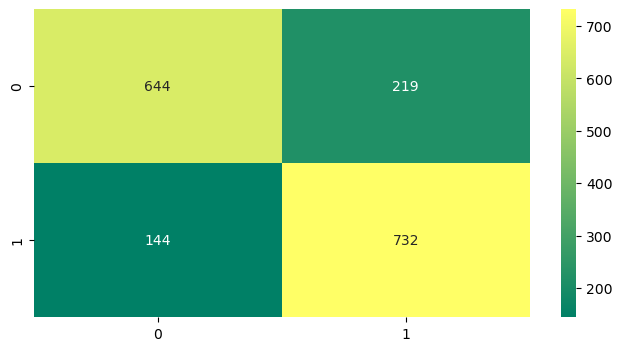

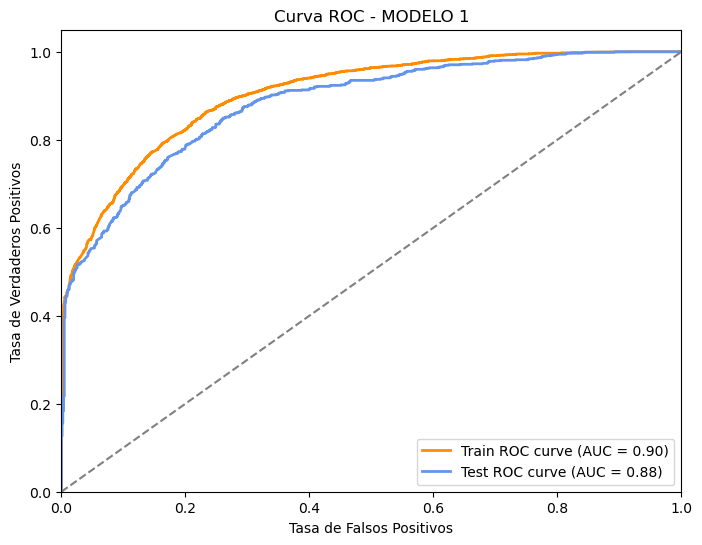

In [126]:
modelo(GradientBoostingClassifier(learning_rate=0.1,
                                  n_estimators=60,
                                  max_depth=9,
                                  min_samples_split=1200,
                                  min_samples_leaf=60,
                                  subsample=0.8,
                                  random_state=10))
Algoritmo.append('GradientTuneadoAmano')

prueba stackong 2

In [127]:
Modelo5 = GradientBoostingClassifier(learning_rate=0.1,
                                  n_estimators=60,
                                  max_depth=9,
                                  min_samples_split=1200,
                                  min_samples_leaf=60,
                                  subsample=0.8,
                                  random_state=10)

In [128]:
Stacking_model2 = StackingClassifier(estimators=[('CAT Boost', Modelo1), 
                                                ('LGBM', Modelo2),
                                                ("XGBoost", Modelo3),
                                                ('GradientBoost', Modelo5)])

C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1656
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
[LightGBM] [Info] Number of positive: 2802, number of negative: 2761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1655
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 22
[LightGBM] [Info] [binary:

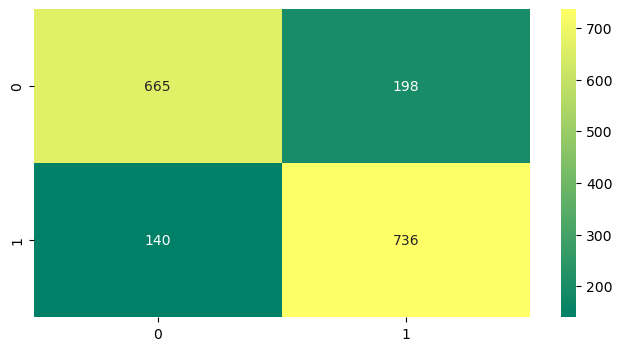

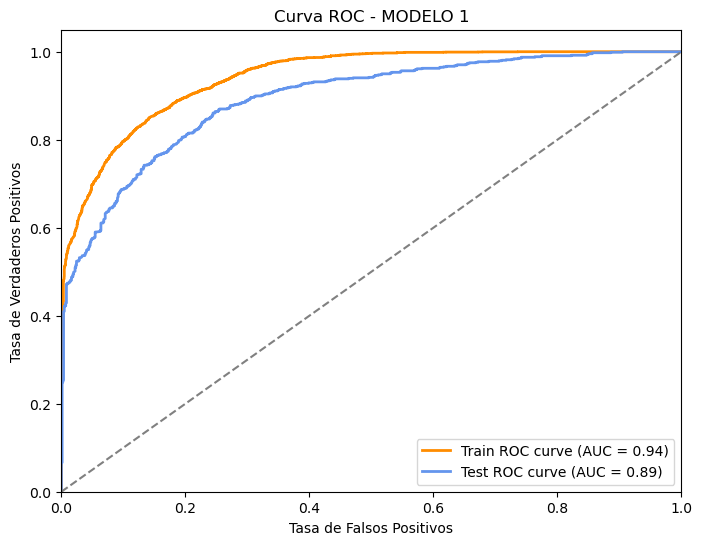

In [129]:
modelo(Stacking_model2)
Algoritmo.append('Stacking Model2')

prueba 3

C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metricas:
Accuracy Score del modelo AdaBoostClassifier(learning_rate=0.47285383296767425, n_estimators=117,
                   random_state=1) sobre Train es: 79.87
Accuracy Score del modelo AdaBoostClassifier(learning_rate=0.47285383296767425, n_estimators=117,
                   random_state=1) sobre Test es: 78.78
 
Precision Score de modelo AdaBoostClassifier(learning_rate=0.47285383296767425, n_estimators=117,
                   random_state=1) sobre Train es: 78.31
Precision Score de modelo AdaBoostClassifier(learning_rate=0.47285383296767425, n_estimators=117,
                   random_state=1) sobre Test es: 76.77
 
Recall Score del modelo AdaBoostClassifier(learning_rate=0.47285383296767425, n_estimators=117,
                   random_state=1) sobre Train es: 83.01
Recall Score del modelo AdaBoostClassifier(learning_rate=0.47285383296767425, n_estimators=117,
                   random_state=1) sobre Test es: 82.99
 
F1 Score del modelo AdaBoostClassifier(learning_rate=0.472853

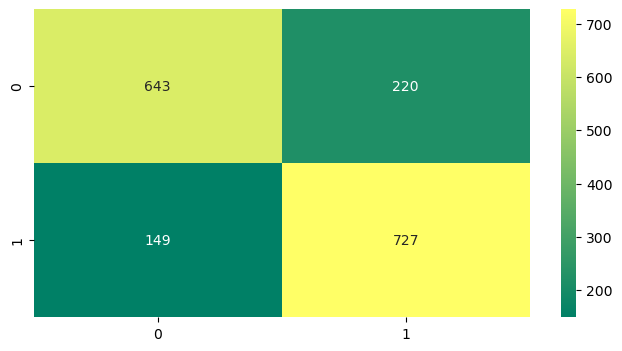

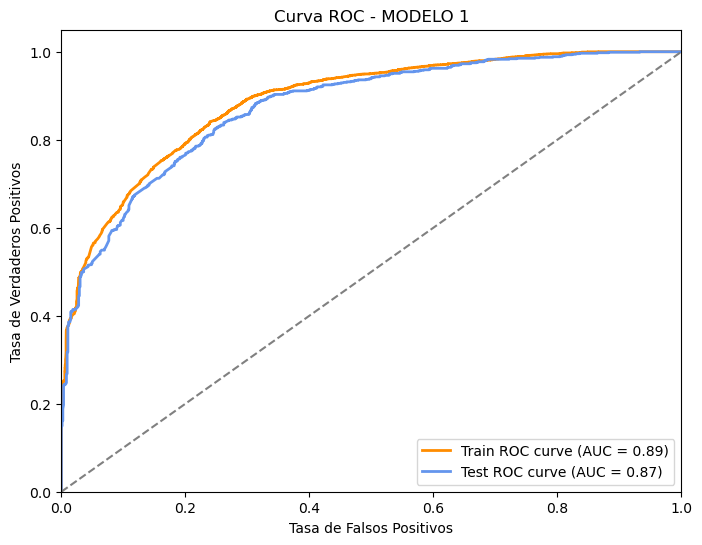

In [130]:
modelo(AdaBoostClassifier(learning_rate=0.47285383296767425,
                          n_estimators=117,
                          random_state=1))
Algoritmo.append('AdaBoostAmano')

In [131]:
Modelo6= AdaBoostClassifier(learning_rate=0.47285383296767425,
                          n_estimators=117,
                          random_state=1)

In [132]:
Stacking_model3 = StackingClassifier(estimators=[('CAT Boost', Modelo1), 
                                                ('LGBM', Modelo2),
                                                ("XGBoost", Modelo3),
                                                ('GradientBoost', Modelo5),
                                                ('AdaBoost', Modelo6)])

C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Valeria\miniconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1656
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
[LightGBM] [Info] Number of positive: 2802, number of negative: 2761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1655
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 22
[LightGBM] [Info] [binary:

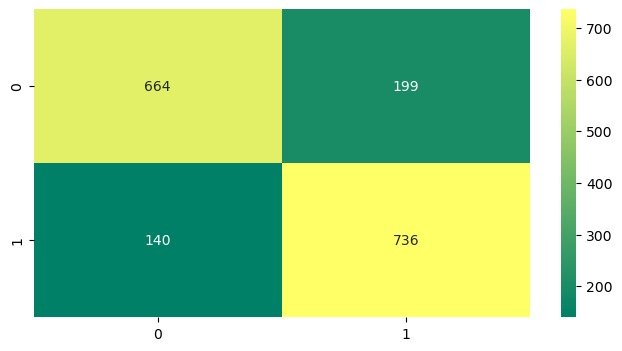

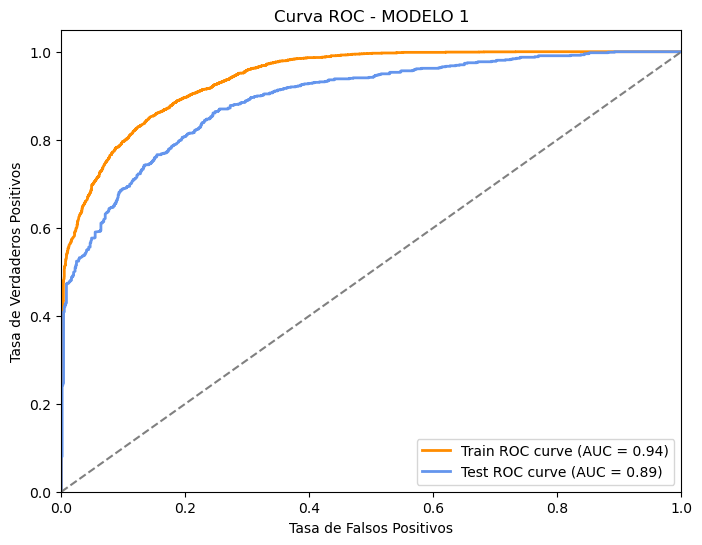

In [133]:
modelo(Stacking_model3)
Algoritmo.append('Stacking Model3')

In [134]:
METRICAS_BIS = pd.DataFrame({"Algoritmo": Algoritmo,
                   "Accuracy train": accuracy_train,
                   "Accuracy test": accuracy_test,
                   "Precision train": precision_train,
                   "Precision test": precision_test,
                   "Recall train": recall_train,
                   "Recall test": recall_test,
                   "F1 train": f1_train,
                   "F1 test": f1_test,
                   "AUC train": AUC_train,
                   "AUC test": AUC_test})
METRICAS_BIS.style.\
    highlight_max(color = 'red').\
    highlight_min(color = 'green')

,Algoritmo,Accuracy train,Accuracy test,Precision train,Precision test,Recall train,Recall test,F1 train,F1 test,AUC train,AUC test
0,DecisionTreeClassifier,96.740000,74.300000,97.040000,74.130000,96.460000,75.230000,96.750000,74.670000,0.997416,0.756036
1,RandomForestClassifier,96.740000,78.550000,95.750000,79.620000,97.860000,77.170000,96.790000,78.380000,0.995011,0.871376
2,AdaBoostClassifier,79.700000,79.010000,77.430000,76.150000,84.240000,84.930000,80.690000,80.300000,0.884088,0.873701
3,GradientBoostingClassifier,81.670000,78.900000,79.860000,76.650000,85.040000,83.560000,82.370000,79.960000,0.905216,0.879255
4,LGBMClassifier,87.420000,79.530000,85.510000,78.020000,90.320000,82.650000,87.850000,80.270000,0.954677,0.889250
5,XGBClassifier,91.590000,80.330000,89.300000,79.150000,94.630000,82.760000,91.890000,80.920000,0.975494,0.886302
6,CatBoostClassifier,86.190000,80.620000,84.610000,79.140000,88.720000,83.560000,86.620000,81.290000,0.946012,0.893668
7,LogisticRegression,77.850000,77.110000,77.270000,75.980000,79.380000,79.790000,78.310000,77.840000,0.851536,0.844343
8,KNeighborsClassifier,82.330000,74.410000,84.060000,75.620000,80.100000,72.600000,82.030000,74.080000,0.912306,0.825276
9,GaussianNB,73.800000,73.090000,78.770000,77.570000,65.680000,65.530000,71.630000,71.040000,0.826005,0.811592
